# Table of Contents
* [Import and Load Necessary Packages](#Import-and-Load-Necessary-Packages)
* [1. HR Analytics](#1.-HR-Analytics)
    * [1.1 Load and Explore the data](#1.1-Load-and-Explore-the-data)
    * [1.2 Undersampling](#1.2-Undersampling)
    * [1.3 Train Test Split](#1.3-Train-Test-Split) 
    * [1.4 Naive Baseline Model](#1.4-Naive-Baseline-Model)
    * [1.5 Checking for Gender Discrimination](#1.5-Checking-for-Gender-Discrimination)
    * [1.6 Feature Scaling](#1.6-Feature-Scaling)
    * [1.7 Modeling](#1.7-Modeling)
        * [XGBoost Models (original + hyper tuned)](#XGBoost-Models-(original-+-hyper-tuned))
        * [Random Forest Models (original + hyper tuned)](#Random-Forest-Models-(original-+-hyper-tuned))
        * [Gradient Boosting Models (original + hyper tuned)](#Gradient-Boosting-Models-(original-+-hyper-tuned))
        * [SVM Models (original + hyper tuned)](#SVM-Models-(original-+-hyper-tuned))
        * [MLP Model (hyper tuned)](#MLP-Model-(hyper-tuned))
        * [Lightgbm Models (original + hyper tuned)](#Lightgbm-Models-(original-+-hyper-tuned))
        * [CatBoost Models (original + hyper tuned)](#CatBoost-Models-(original-+-hyper-tuned))
        * [Ensemble Models (Stacked and Voting Models)](#Ensemble-Models-(Stacked-and-Voting-Models))
    * [1.8 Documentation of Best Models](#1.8-Documentation-of-Best-Models)              

## Import and Load Necessary Packages

In [95]:
# ==============================
# 1. Core Libraries
# ==============================
import pandas as pd
import numpy as np
import random
from math import sqrt

# ==============================
# 2. Data Preprocessing
# ==============================

## Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

# ==============================
# 3. Data Splitting & Pipeline Construction
# ==============================
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# ==============================
# 4. Machine Learning Models
# ==============================

## Regression Models
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor  # Neural Network Regressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
!pip install lightgbm
import lightgbm as lgb
from sklearn.linear_model import PoissonRegressor
!pip install catboost
import catboost
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import BayesianRidge
from lightgbm import LGBMRegressor
from sklearn.ensemble import StackingRegressor
import xgboost as xgb
from sklearn.ensemble import VotingRegressor


## Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier


## Hyperparameter Tuning & Model Evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, cross_validate

# ==============================
# 5. Model Performance Metrics
# ==============================
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, f1_score
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import explained_variance_score

# ==============================
# 6. Statistical Analysis
# ==============================
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import ttest_ind

# ==============================
# 7. Data Visualization
# ==============================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline

# ==============================
# 8. Other Libraries
# ==============================
import xgboost as xgb
import shap

## 1. HR Analytics

### 1.1 Load and Explore the data

In [2]:
# -------------------------
# 1. LOAD & PREPROCESS DATA
# -------------------------
# Load the dataset (ensure hr_data.csv is in your working directory)
df = pd.read_csv("hr_data_new.csv")

In [3]:
# Display the first few rows and summary
print("Raw Data:")
display(df.describe())

Raw Data:


,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred,gender_f,gender_m,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.185348,0.087592,0.559316,0.154670,34.803915,3.304481,1.518125,0.351974,0.023172,63.386750,0.555503,0.423661,0.020836,0.297621,0.702379,0.085170
std,0.094552,0.081462,0.889452,0.335244,7.660169,1.214770,0.737329,0.477590,0.150450,13.371559,0.496914,0.494142,0.142838,0.457216,0.457216,0.279137
min,0.017855,0.000521,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130014,0.020931,0.000000,0.000000,29.000000,3.000000,1.098612,0.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.207585,0.048847,0.000000,0.000000,33.000000,3.000000,1.609438,0.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.306243,0.116121,2.000000,0.000000,39.000000,4.000000,1.945910,1.000000,0.000000,76.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,0.306243,0.225961,2.000000,2.302585,60.000000,5.000000,3.610918,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Print Summaries of the DataFrames

This information is valuable for understanding the structure of the data, which could help in identifying potential issues like missing values or data type inconsistencies, which allows me to make informed decisions about further analysis.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department                    54808 non-null  float64
 1   region                        54808 non-null  float64
 2   education                     54808 non-null  int64  
 3   no_of_trainings               54808 non-null  float64
 4   age                           54808 non-null  int64  
 5   previous_year_rating          54808 non-null  float64
 6   length_of_service             54808 non-null  float64
 7   KPIs_met >80%                 54808 non-null  int64  
 8   awards_won?                   54808 non-null  int64  
 9   avg_training_score            54808 non-null  int64  
 10  recruitment_channel_other     54808 non-null  int64  
 11  recruitment_channel_sourcing  54808 non-null  int64  
 12  recruitment_channel_referred  54808 non-null  int64  
 13  g

### Display the data types of the variables

In [5]:
df.dtypes

department                      float64
region                          float64
education                         int64
no_of_trainings                 float64
age                               int64
previous_year_rating            float64
length_of_service               float64
KPIs_met >80%                     int64
awards_won?                       int64
avg_training_score                int64
recruitment_channel_other         int64
recruitment_channel_sourcing      int64
recruitment_channel_referred      int64
gender_f                          int64
gender_m                          int64
is_promoted                       int64
dtype: object

### Display the descriptive statistics of the DataFrames

In [6]:
df.describe()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred,gender_f,gender_m,is_promoted
count,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,0.185348,0.087592,0.559316,0.154670,34.803915,3.304481,1.518125,0.351974,0.023172,63.386750,0.555503,0.423661,0.020836,0.297621,0.702379,0.085170
std,0.094552,0.081462,0.889452,0.335244,7.660169,1.214770,0.737329,0.477590,0.150450,13.371559,0.496914,0.494142,0.142838,0.457216,0.457216,0.279137
min,0.017855,0.000521,0.000000,0.000000,20.000000,1.000000,0.000000,0.000000,0.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.130014,0.020931,0.000000,0.000000,29.000000,3.000000,1.098612,0.000000,0.000000,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.207585,0.048847,0.000000,0.000000,33.000000,3.000000,1.609438,0.000000,0.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.306243,0.116121,2.000000,0.000000,39.000000,4.000000,1.945910,1.000000,0.000000,76.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,0.306243,0.225961,2.000000,2.302585,60.000000,5.000000,3.610918,1.000000,1.000000,99.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Explore the size of the DataFrames

In [7]:
# Get the shape of the DataFrame
rows, cols = df.shape

# Print the number of rows
print(f"The DataFrame has {rows} rows and {cols} columns")

The DataFrame has 54808 rows and 16 columns


### Display and examine the contents in the DataFrames

In [8]:
pd.set_option('display.max_columns', None)
display(df.head())

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred,gender_f,gender_m,is_promoted
0,0.207585,0.048847,0,0.0,38,3.0,2.079442,0,0,61,1,0,0,1,0,0
1,0.131057,0.035605,0,0.0,28,3.0,0.000000,0,0,81,0,1,0,0,1,1
2,0.207585,0.116121,2,0.0,41,4.0,1.098612,1,0,63,0,1,0,1,0,0
3,0.131057,0.089535,2,0.0,36,4.0,2.302585,1,0,83,1,0,0,0,1,0
4,0.306243,0.014310,0,0.0,26,5.0,1.609438,0,0,46,0,1,0,1,0,0


In [9]:
pd.set_option('display.max_columns', None)
display(df.tail())

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred,gender_f,gender_m,is_promoted
54803,0.207585,0.009748,0,0.000000,34,4.0,1.791759,0,0,63,0,1,0,1,0,0
54804,0.306243,0.015248,0,0.693147,34,3.0,1.609438,0,0,51,1,0,0,0,1,0
54805,0.096885,0.116121,0,1.098612,29,1.0,1.098612,0,0,93,1,0,0,0,1,0
54806,0.306243,0.015248,0,0.000000,23,3.0,0.000000,0,0,50,1,0,0,0,1,0
54807,0.130014,0.225961,2,0.000000,44,5.0,1.609438,1,0,75,0,0,1,1,0,1


### Checking for null values

In [10]:
# Percentage of null data in each column of the merged dataset
null_percentages = df.isnull().mean() * 100
print(null_percentages.sort_values(ascending=True).to_string())

department                      0.0
region                          0.0
education                       0.0
no_of_trainings                 0.0
age                             0.0
previous_year_rating            0.0
length_of_service               0.0
KPIs_met >80%                   0.0
awards_won?                     0.0
avg_training_score              0.0
recruitment_channel_other       0.0
recruitment_channel_sourcing    0.0
recruitment_channel_referred    0.0
gender_f                        0.0
gender_m                        0.0
is_promoted                     0.0


### Visualize the probability distribution of data

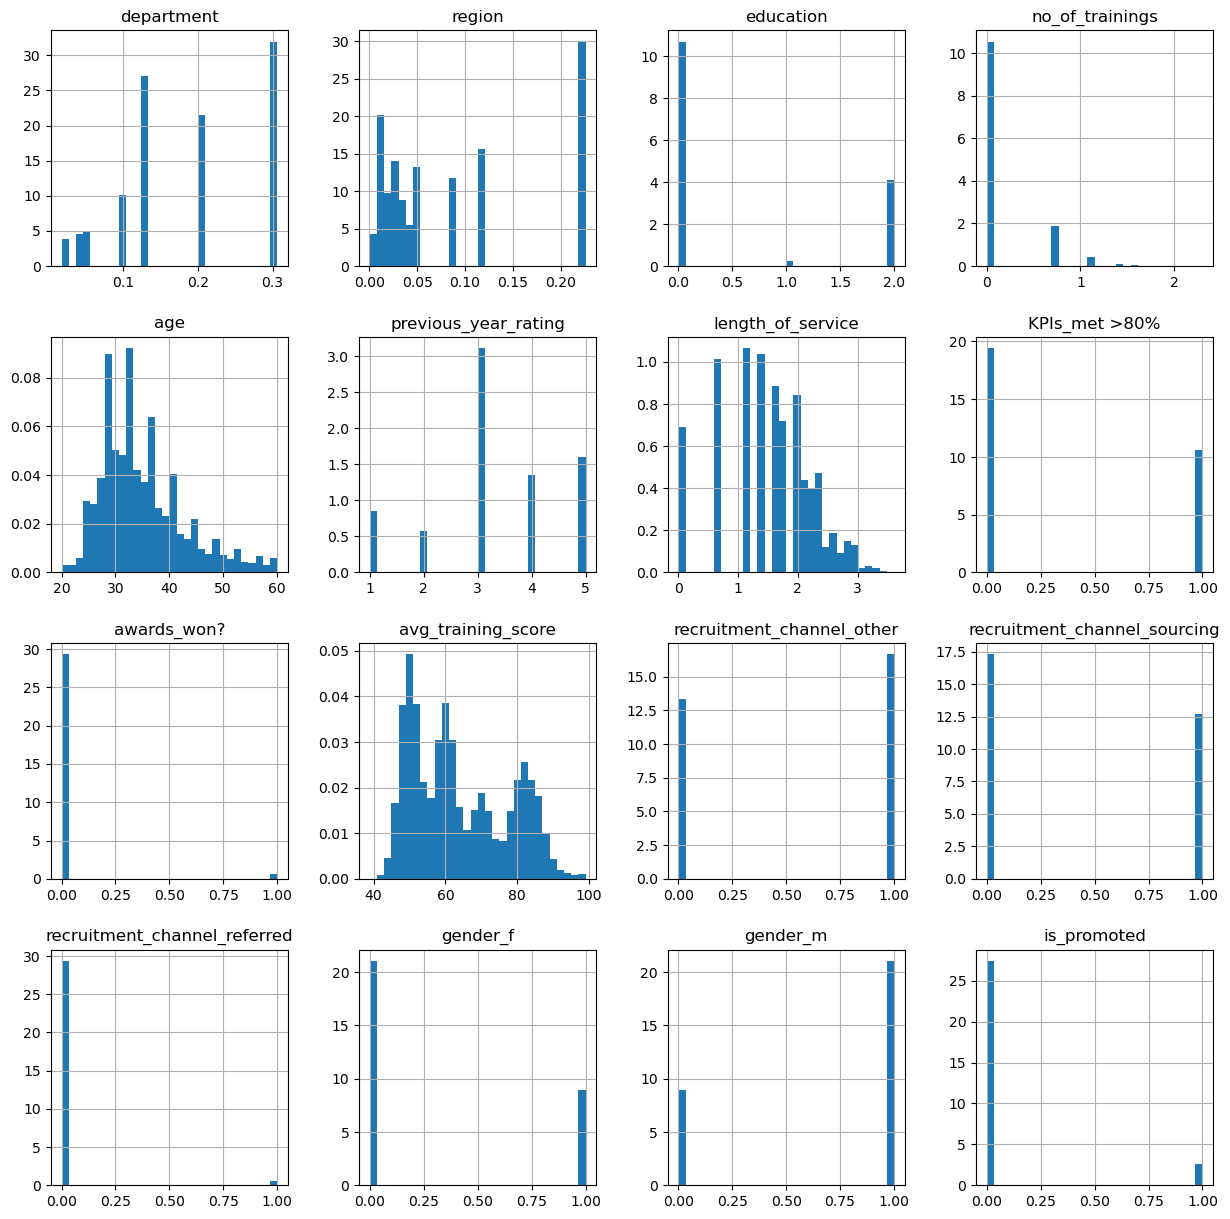

In [11]:
# Visualise the distribution of numerical features using histograms
df.hist(bins=30, figsize=(15,15), density=True)
plt.show()

In [12]:
# Plot histogram, Q-Q plots, and boxplot to have a look at the variable distribution

def diagnostic_plots(df, variable):
    # function takes a final_data and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


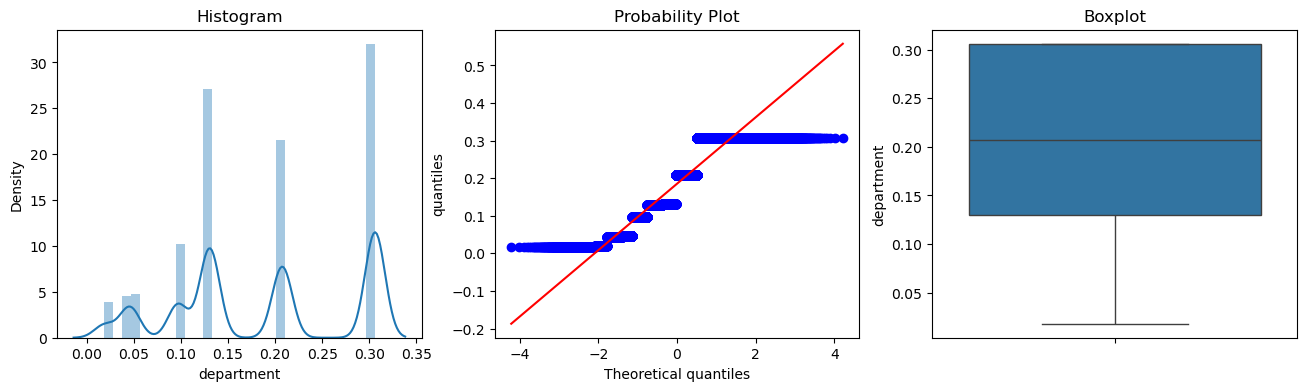

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


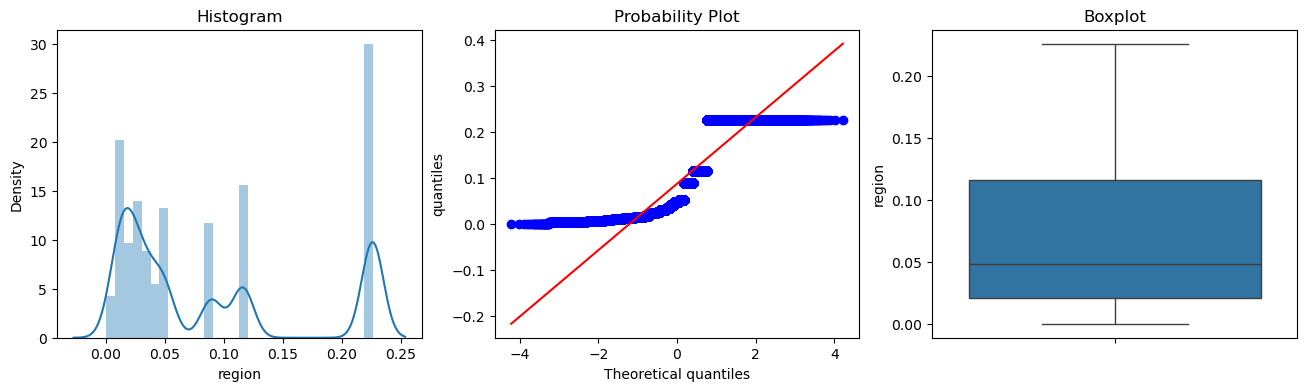

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


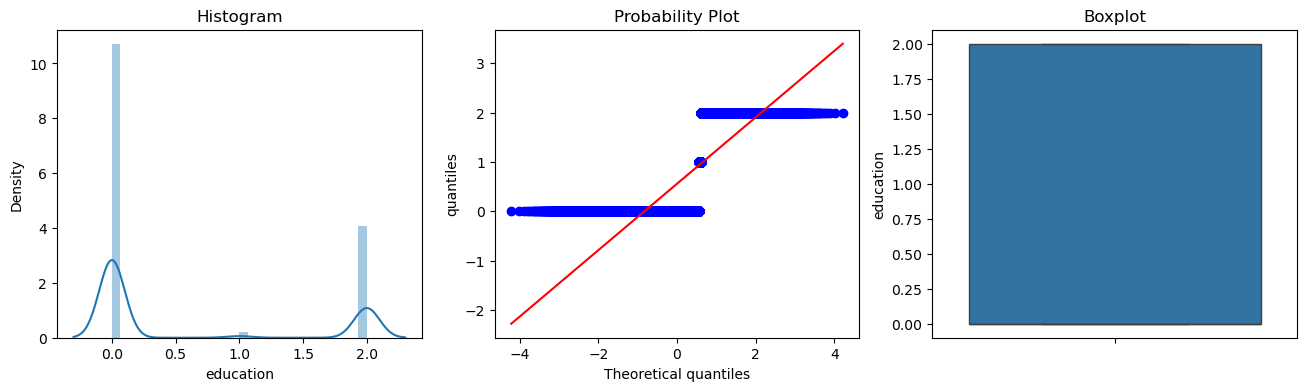

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


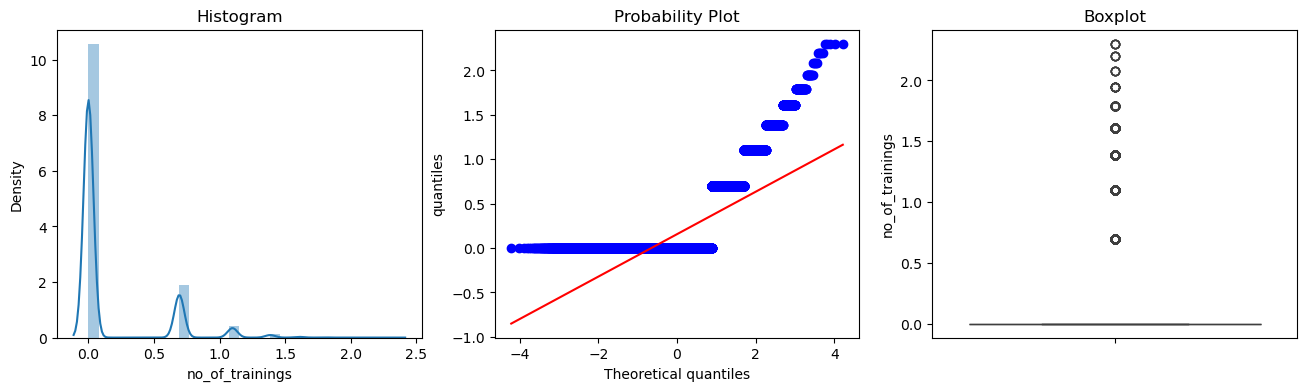

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


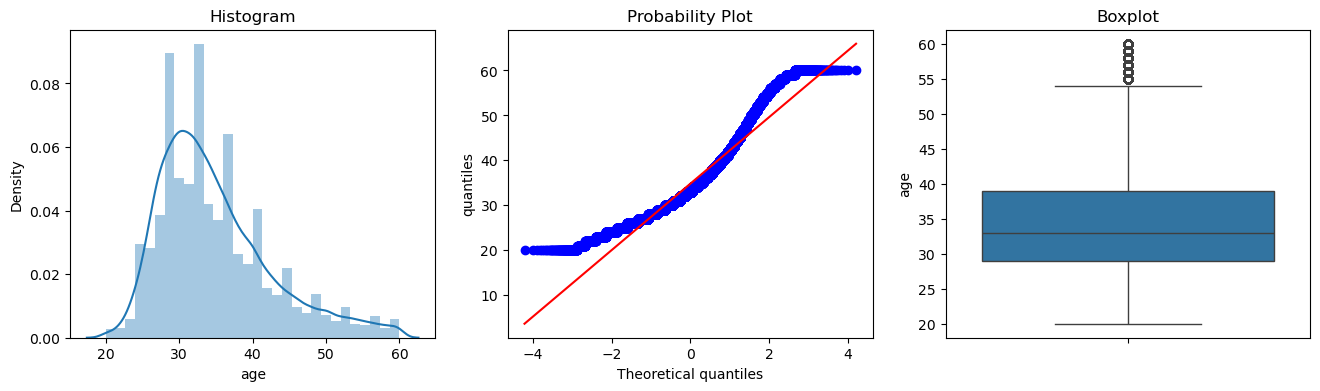

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


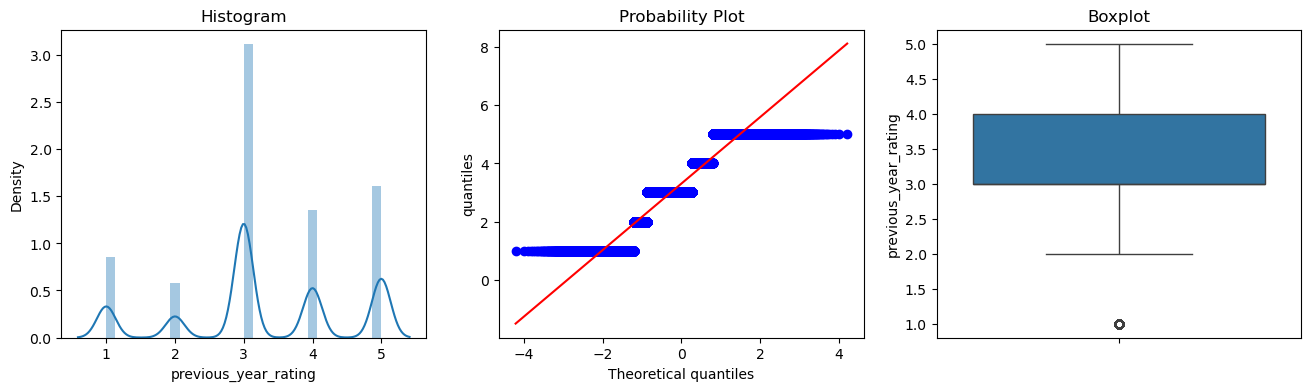

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


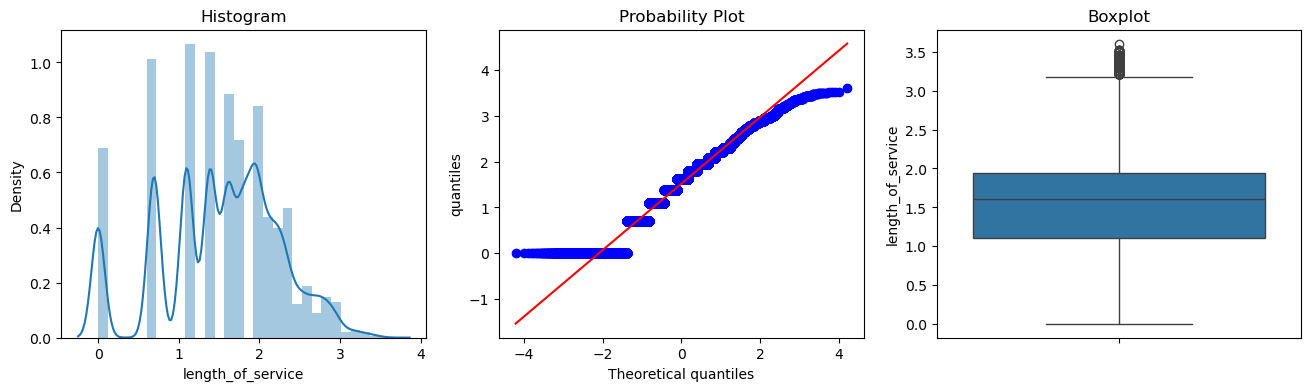

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


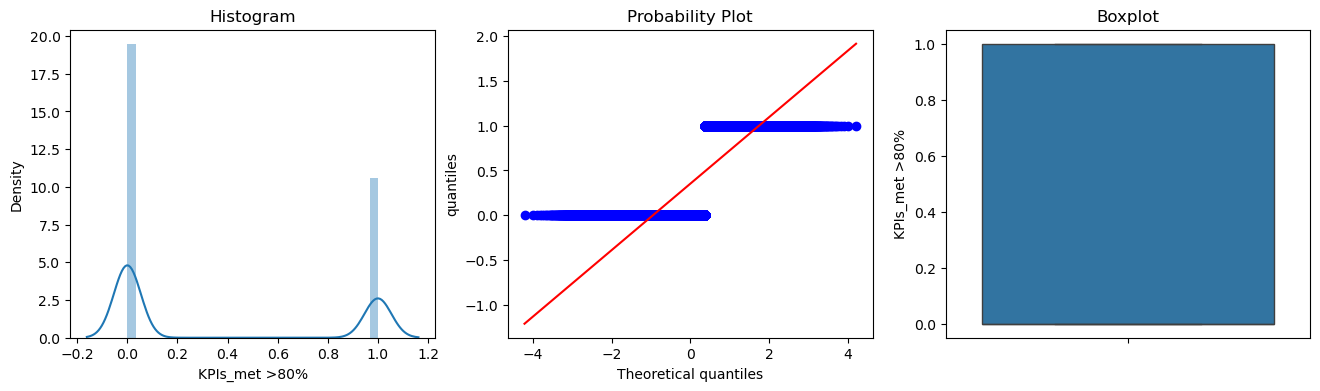

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


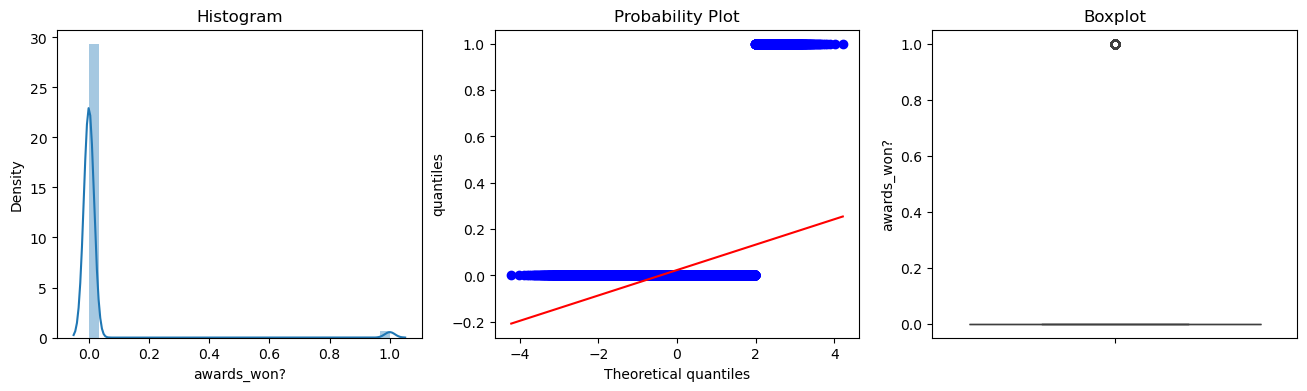

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


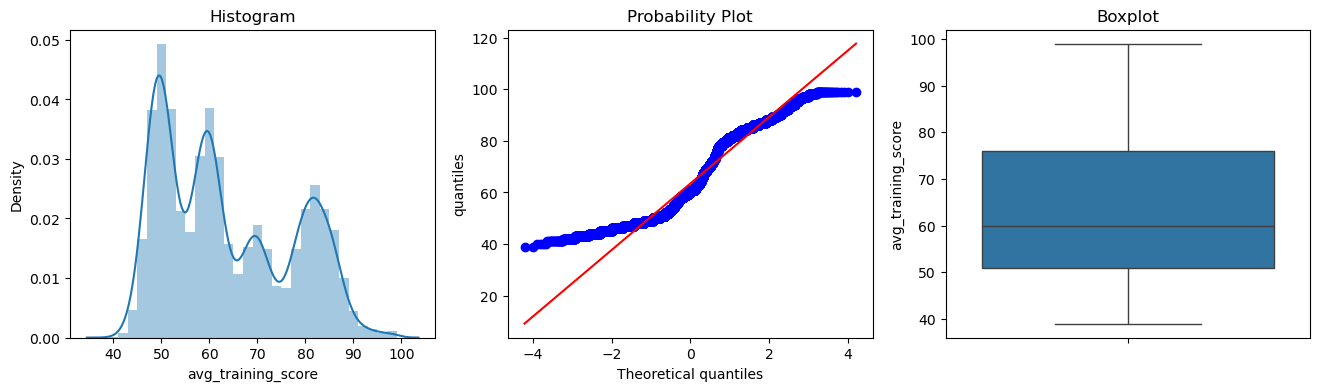

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


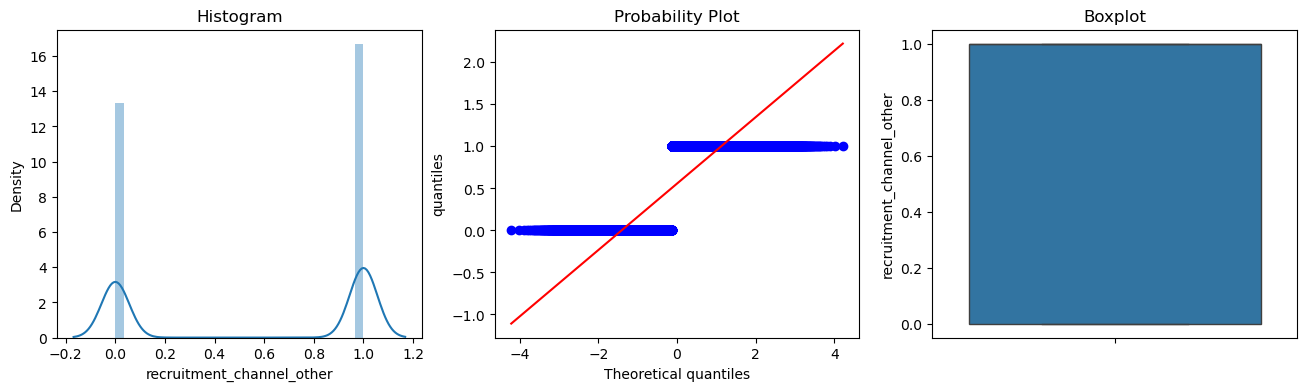

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


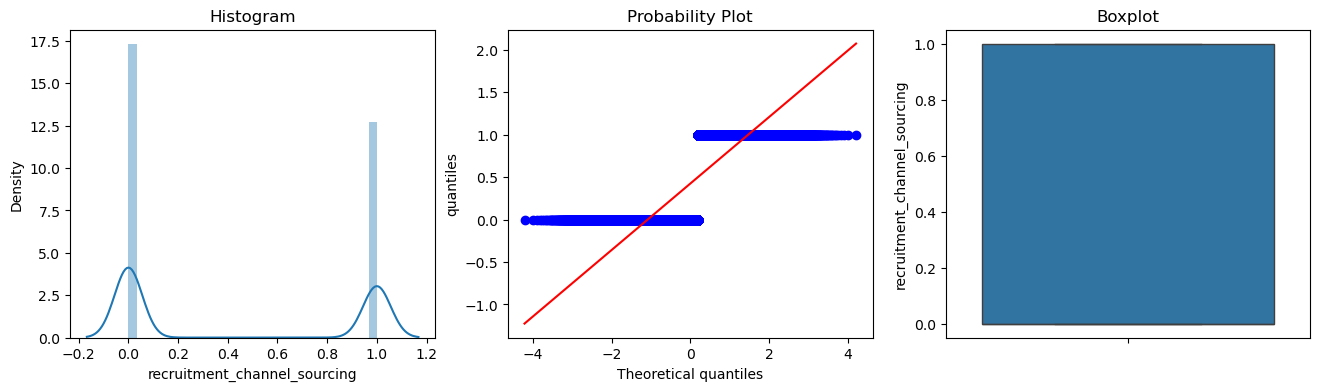

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


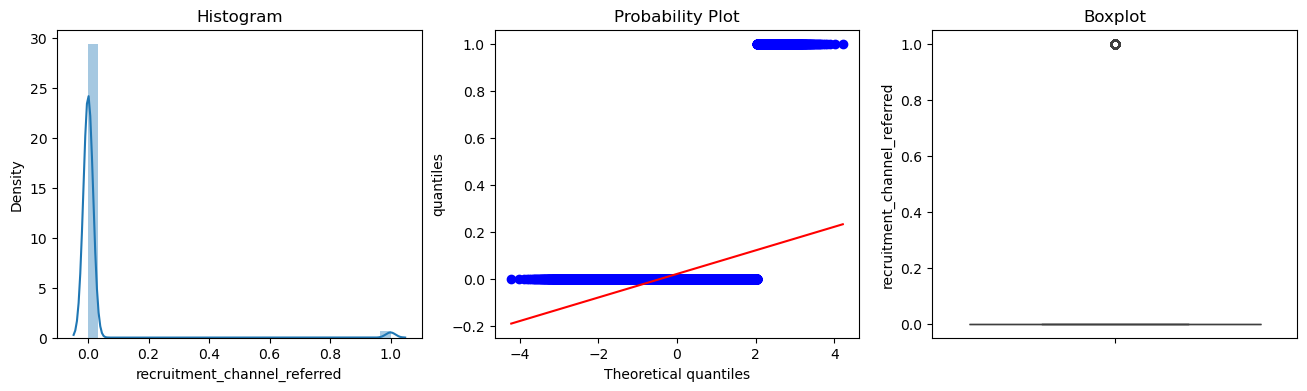

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


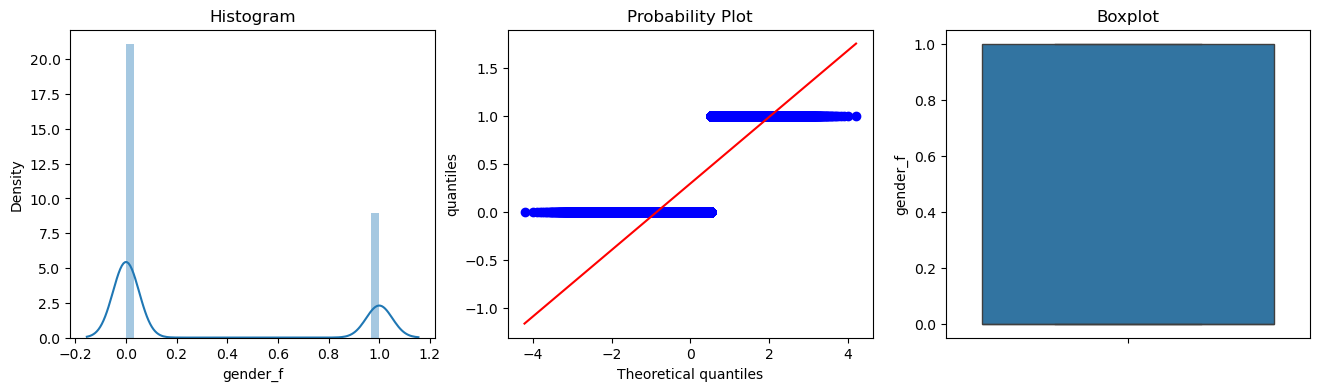

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


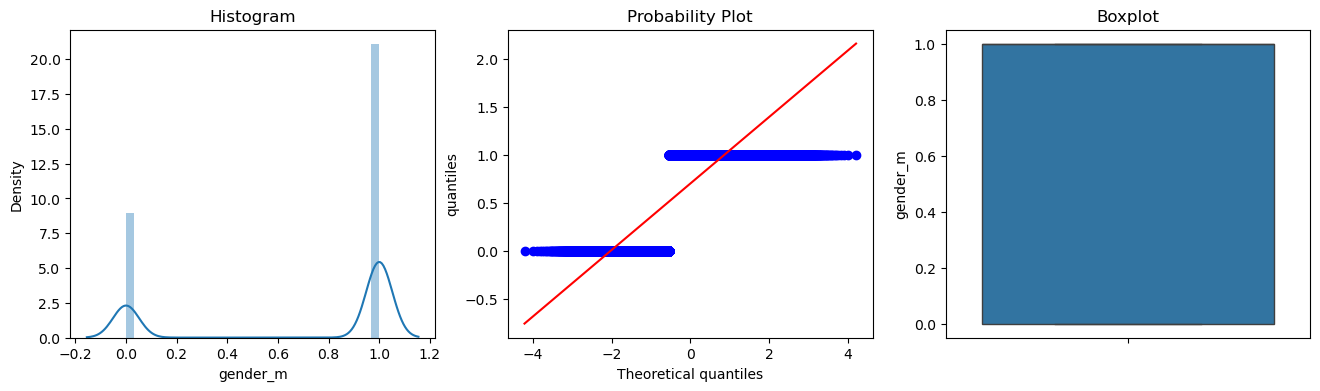

C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3050678385.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[variable], bins=30)


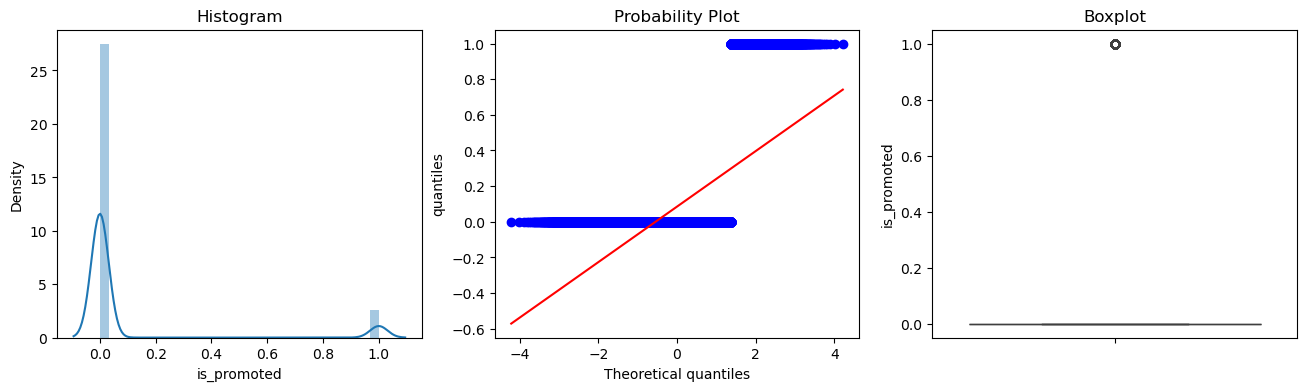

In [13]:
# Check original distribution
# and detecting outliers using boxplots
for num_column in df:
    diagnostic_plots(df, num_column)

#### Target Variable Distribution

In [14]:
# Target Variable

promotion_distribution = df['is_promoted'].value_counts(normalize=True)

print("Distribution of 'is_promoted':")
print(promotion_distribution)

Distribution of 'is_promoted':
is_promoted
0    0.91483
1    0.08517
Name: proportion, dtype: float64


### Basic Data Cleaning

In [15]:
# Data Cleaning:
# Remove redundant gender column if it exists (we assume 'gender_f' exists, where 1 = Female, 0 = Male)
if 'gender_m' in df.columns:
    df = df.drop(columns=['gender_m'])

## 1.2 Undersampling

In [16]:
df['is_promoted'].value_counts()

is_promoted
0    50140
1     4668
Name: count, dtype: int64

In [17]:
hr1=df[df['is_promoted']==1]
hr1.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred,gender_f,is_promoted
1,0.131057,0.035605,0,0.0,28,3.0,0.000000,0,0,81,0,1,0,0,1
9,0.306243,0.024084,2,0.0,43,3.0,2.397895,1,0,55,1,0,0,0,1
12,0.096885,0.116121,0,0.0,27,4.0,1.098612,0,1,85,0,1,0,0,1
23,0.207585,0.051323,0,0.0,34,5.0,2.079442,1,0,59,1,0,0,0,1
45,0.130014,0.048847,2,0.0,41,5.0,2.564949,1,0,70,0,1,0,1,1


In [18]:
len(hr1)

4668

In [19]:
hr0=df[df['is_promoted']==0]
hr0.head()

,department,region,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,recruitment_channel_other,recruitment_channel_sourcing,recruitment_channel_referred,gender_f,is_promoted
0,0.207585,0.048847,0,0.0,38,3.0,2.079442,0,0,61,1,0,0,1,0
2,0.207585,0.116121,2,0.0,41,4.0,1.098612,1,0,63,0,1,0,1,0
3,0.131057,0.089535,2,0.0,36,4.0,2.302585,1,0,83,1,0,0,0,0
4,0.306243,0.014310,0,0.0,26,5.0,1.609438,0,0,46,0,1,0,1,0
5,0.096885,0.014310,0,0.0,39,5.0,1.098612,1,0,87,0,1,0,0,0


In [20]:
hr0_sampled = hr0.sample(n=len(hr1), random_state=2).copy()
hr0_sampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4668 entries, 6696 to 12968
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   department                    4668 non-null   float64
 1   region                        4668 non-null   float64
 2   education                     4668 non-null   int64  
 3   no_of_trainings               4668 non-null   float64
 4   age                           4668 non-null   int64  
 5   previous_year_rating          4668 non-null   float64
 6   length_of_service             4668 non-null   float64
 7   KPIs_met >80%                 4668 non-null   int64  
 8   awards_won?                   4668 non-null   int64  
 9   avg_training_score            4668 non-null   int64  
 10  recruitment_channel_other     4668 non-null   int64  
 11  recruitment_channel_sourcing  4668 non-null   int64  
 12  recruitment_channel_referred  4668 non-null   int64  
 13  gend

In [21]:
df_sampled=pd.concat([hr1,hr0_sampled],axis=0)
df_sampled['is_promoted'].value_counts()

is_promoted
1    4668
0    4668
Name: count, dtype: int64

## 1.3 Train Test Split

In [22]:
# -------------------------
# 2. SET UP FEATURES & TARGET
# -------------------------
X = df_sampled.drop(columns=['is_promoted'])
y = df_sampled['is_promoted']

In [23]:
# -------------------------
# 3. SPLIT DATA INTO TRAIN & TEST
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training and Test Sets Created.")

Training and Test Sets Created.


### 1.4 Naive Baseline Model

In [100]:
import numpy as np
from scipy import stats

# pick the modal class from train data
print(stats.mode(y_train))

modal_class_label = stats.mode(y_train)[0]

# print(f"The modal class label is {int(modal_class_label)}, \
# and the accompanying string value of this label is {y_labels[modal_class_label]}.")
# # identifies the modal class

ModeResult(mode=0, count=3273)


In [102]:
y_train_preds_naive = [int(modal_class_label) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

# using the modal value for prediction
# large assumption that every value in y train is the modal value

[0, 0, 0, 0, 0]

In [103]:
y_test_preds_naive = [int(modal_class_label) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[0, 0, 0, 0, 0]

In [104]:
from sklearn.metrics import accuracy_score

# train accuracy score
y_true = y_train
y_pred = y_train_preds_naive

train_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on train data is {train_accuracy_naive:.2f}%.")

# test accuracy score
y_true = y_test
y_pred = y_test_preds_naive

test_accuracy_naive = accuracy_score(y_true, y_pred) * 100
print(f"The Naive Baseline Model's accuracy on test data is {test_accuracy_naive:.2f}%.")

The Naive Baseline Model's accuracy on train data is 50.08%.
The Naive Baseline Model's accuracy on test data is 49.80%.


## 1.5 Checking for Gender Discrimination

#### The model’s higher female promotion rate is likely justified by better performance metrics (training scores, KPIs). However, further checks can help ensure fairness if needed.

In [77]:
# Train initial Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred = rf_model.predict(X_test)

In [78]:
# Evaluate model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print('Initial Confusion Matrix:\n', conf_matrix)
print('Initial Classification Report:\n', class_report)

Initial Confusion Matrix:
 [[ 987  408]
 [ 185 1221]]
Initial Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.71      0.77      1395
           1       0.75      0.87      0.80      1406

    accuracy                           0.79      2801
   macro avg       0.80      0.79      0.79      2801
weighted avg       0.80      0.79      0.79      2801



In [79]:
# Analyze gender-based promotion bias
gender_promotion_rates = X_test.copy()
gender_promotion_rates['actual_promotion'] = y_test.values
gender_promotion_rates['predicted_promotion'] = y_pred
gender_promotion_rates = gender_promotion_rates.groupby(['gender_f'])['predicted_promotion'].mean() * 100
gender_promotion_rates.index = ['Not Female', 'Female']
print('Predicted Promotion Rates by Gender:\n', gender_promotion_rates)

Predicted Promotion Rates by Gender:
 Not Female    57.363543
Female        59.953434
Name: predicted_promotion, dtype: float64


In [80]:
# Compute class weights for imbalance handling
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [81]:
# Train new model with class weighting
rf_model_weighted = RandomForestClassifier(n_estimators=200, random_state=42, class_weight=class_weight_dict)
rf_model_weighted.fit(X_train, y_train)

# Predictions with weighted model
y_pred_weighted = rf_model_weighted.predict(X_test)

In [82]:
# Evaluate improved model
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)
print('Improved Confusion Matrix:\n', conf_matrix_weighted)
print('Improved Classification Report:\n', class_report_weighted)

Improved Confusion Matrix:
 [[ 989  406]
 [ 199 1207]]
Improved Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1395
           1       0.75      0.86      0.80      1406

    accuracy                           0.78      2801
   macro avg       0.79      0.78      0.78      2801
weighted avg       0.79      0.78      0.78      2801



In [83]:
# Analyze gender-based promotion bias
actual_promotion_rates = df_sampled.groupby(['gender_f'])['is_promoted'].mean() * 100
actual_promotion_rates.index = ['Not Female', 'Female']
print('Actual Promotion Rates by Gender:\n', actual_promotion_rates)

gender_promotion_rates = X_test.copy()
gender_promotion_rates['actual_promotion'] = y_test.values
gender_promotion_rates['predicted_promotion'] = y_pred
gender_promotion_rates = gender_promotion_rates.groupby(['gender_f'])['predicted_promotion'].mean() * 100
gender_promotion_rates.index = ['Not Female', 'Female']
print('\nPredicted Promotion Rates by Gender:\n', gender_promotion_rates)

Actual Promotion Rates by Gender:
 Not Female    49.421028
Female        51.311647
Name: is_promoted, dtype: float64

Predicted Promotion Rates by Gender:
 Not Female    57.363543
Female        59.953434
Name: predicted_promotion, dtype: float64


In [84]:
# Compute class weights for imbalance handling
class_weights = compute_class_weight(class_weight="balanced", classes=np.array([0, 1]), y=y_train)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [85]:
# Train new model with class weighting
rf_model_weighted = RandomForestClassifier(n_estimators=200, random_state=42, class_weight=class_weight_dict)
rf_model_weighted.fit(X_train, y_train)

# Predictions with weighted model
y_pred_weighted = rf_model_weighted.predict(X_test)

# Evaluate improved model
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)
print('Improved Confusion Matrix:\n', conf_matrix_weighted)
print('Improved Classification Report:\n', class_report_weighted)

Improved Confusion Matrix:
 [[ 989  406]
 [ 199 1207]]
Improved Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.71      0.77      1395
           1       0.75      0.86      0.80      1406

    accuracy                           0.78      2801
   macro avg       0.79      0.78      0.78      2801
weighted avg       0.79      0.78      0.78      2801



C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\3403195643.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')


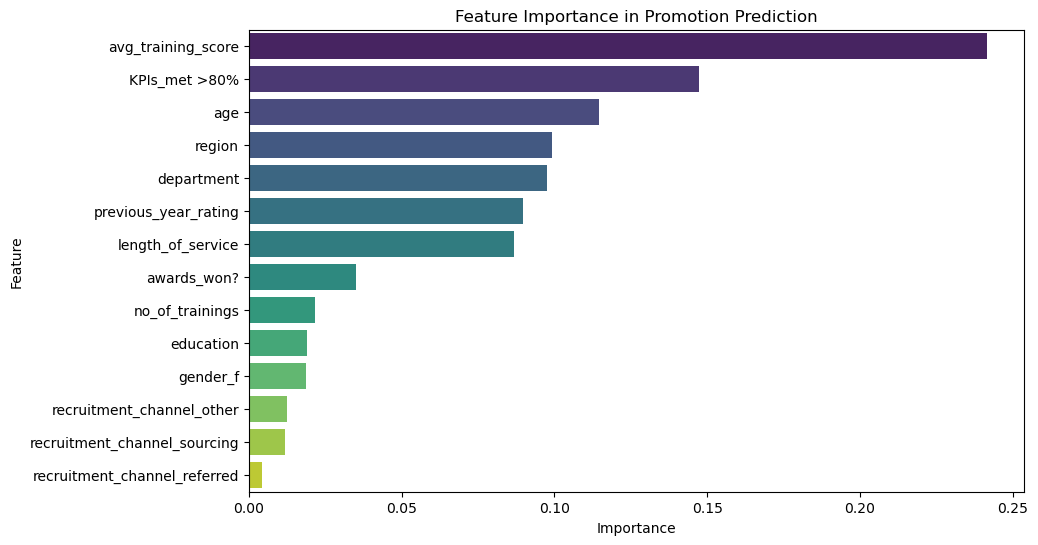

Top Contributing Features:
                 Feature  Importance
9    avg_training_score    0.241583
7         KPIs_met >80%    0.147338
4                   age    0.114642
1                region    0.099354
0            department    0.097669
5  previous_year_rating    0.089622
6     length_of_service    0.086802
8           awards_won?    0.035038
3       no_of_trainings    0.021720
2             education    0.019016


In [86]:
# Feature Importance Analysis
feature_importances = rf_model_weighted.feature_importances_
feature_names = df_sampled.drop(columns=['is_promoted']).columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Promotion Prediction')
plt.show()

print('Top Contributing Features:\n', feature_importance_df.head(10))

In [87]:
# Separate data by gender
female_data = X_test[X_test['gender_f'] == 1]
male_data = X_test[X_test['gender_f'] == 0]

# Compare average training scores
avg_training_score_female = female_data['avg_training_score'].mean()
avg_training_score_male = male_data['avg_training_score'].mean()

# Compare KPI met percentages
kpi_met_female = female_data['KPIs_met >80%'].mean()
kpi_met_male = male_data['KPIs_met >80%'].mean()

# Perform t-test to check statistical significance
t_test_training = ttest_ind(female_data['avg_training_score'], male_data['avg_training_score'], equal_var=False)
t_test_kpi = ttest_ind(female_data['KPIs_met >80%'], male_data['KPIs_met >80%'], equal_var=False)

# Print results
print(f"Average Training Score - Female: {avg_training_score_female}, Male: {avg_training_score_male}")
print(f"KPI Met >80% - Female: {kpi_met_female}, Male: {kpi_met_male}")
print(f"T-test (Training Score): p-value = {t_test_training.pvalue}")
print(f"T-test (KPI Met): p-value = {t_test_kpi.pvalue}")

Average Training Score - Female: 67.82188591385332, Male: 67.216271884655
KPI Met >80% - Female: 0.5366705471478463, Male: 0.5015447991761071
T-test (Training Score): p-value = 0.285433589322273
T-test (KPI Met): p-value = 0.08620166841716805


In [88]:
# Ensure X_test has gender information and merge predictions
X_test_with_preds = X_test.copy()
X_test_with_preds['predicted_promotion'] = y_pred  # Add predictions

# Calculate actual promotion rates by gender
actual_promotion_rates = df_sampled.groupby('gender_f')['is_promoted'].mean()

# Calculate predicted promotion rates by gender
predicted_promotion_rates = X_test_with_preds.groupby('gender_f')['predicted_promotion'].mean()

# Compute Disparate Impact (ratio of female vs male promotion rates)
disparate_impact_actual = actual_promotion_rates[1] / actual_promotion_rates[0]
disparate_impact_predicted = predicted_promotion_rates[1] / predicted_promotion_rates[0]

print("Actual Promotion Rates by Gender:\n", actual_promotion_rates)
print("Predicted Promotion Rates by Gender:\n", predicted_promotion_rates)
print("Disparate Impact (Actual):", disparate_impact_actual)
print("Disparate Impact (Predicted):", disparate_impact_predicted)

Actual Promotion Rates by Gender:
 gender_f
0    0.494210
1    0.513116
Name: is_promoted, dtype: float64
Predicted Promotion Rates by Gender:
 gender_f
0    0.573635
1    0.599534
Name: predicted_promotion, dtype: float64
Disparate Impact (Actual): 1.0382553589463943
Disparate Impact (Predicted): 1.0451487366839234


In [89]:
# -------------------------
# 5. FAIRNESS METRICS (example: gender, department)
# -------------------------
# We now analyze fairness by comparing actual and predicted promotion rates by gender and department.

# Create a copy of X_test to add actual target and predictions.
X_test_copy = X_test.copy()
X_test_copy['is_promoted'] = y_test.values
# Use predictions from one of the models; here, we'll use XGBoost predictions.
X_test_copy['predicted'] = voting_pred_s

In [90]:
# (a) Fairness by Gender using 'gender_f'
if 'gender_f' in X_test_copy.columns:
    print("\nFairness Analysis by Gender (using 'gender_f'):")
    actual_gender_rates = X_test_copy.groupby('gender_f')['is_promoted'].mean()
    predicted_gender_rates = X_test_copy.groupby('gender_f')['predicted'].mean()
    print("Actual Promotion Rates by Gender (gender_f):")
    print(actual_gender_rates)
    print("Predicted Promotion Rates by Gender (gender_f):")
    print(predicted_gender_rates)
    # Assuming binary gender_f with values 0 (Not Female) and 1 (Female)
    if 0 in actual_gender_rates.index and 1 in actual_gender_rates.index:
        di_actual = actual_gender_rates.loc[1] / actual_gender_rates.loc[0]
        di_predicted = predicted_gender_rates.loc[1] / predicted_gender_rates.loc[0]
        print("Disparate Impact (Actual, Female/Male): {:.2f}".format(di_actual))
        print("Disparate Impact (Predicted, Female/Male): {:.2f}".format(di_predicted))
else:
    print("Column 'gender_f' not found in the dataset for gender-based fairness analysis.")


Fairness Analysis by Gender (using 'gender_f'):
Actual Promotion Rates by Gender (gender_f):
gender_f
0    0.486612
1    0.536671
Name: is_promoted, dtype: float64
Predicted Promotion Rates by Gender (gender_f):
gender_f
0    0.590113
1    0.623981
Name: predicted, dtype: float64
Disparate Impact (Actual, Female/Male): 1.10
Disparate Impact (Predicted, Female/Male): 1.06


In [91]:
# (b) Fairness by Department
if 'department' in X_test_copy.columns:
    print("\nFairness Analysis by Department:")
    dept_actual = X_test_copy.groupby('department')['is_promoted'].mean()
    dept_predicted = X_test_copy.groupby('department')['predicted'].mean()
    print("Actual Promotion Rates by Department:")
    print(dept_actual)
    print("Predicted Promotion Rates by Department:")
    print(dept_predicted)
else:
    print("Column 'department' not found in the dataset for department-level fairness analysis.")


Fairness Analysis by Department:
Actual Promotion Rates by Department:
department
0.017855    0.537037
0.019262    0.444444
0.043946    0.406593
0.047152    0.452991
0.096885    0.538710
0.130014    0.531856
0.131057    0.538106
0.207585    0.540268
0.306243    0.444584
Name: is_promoted, dtype: float64
Predicted Promotion Rates by Department:
department
0.017855    0.314815
0.019262    0.511111
0.043946    0.384615
0.047152    0.589744
0.096885    0.670968
0.130014    0.637119
0.131057    0.653580
0.207585    0.635906
0.306243    0.551637
Name: predicted, dtype: float64



Plotting Departmental Promotion Trends...


C:\Users\tswr1\AppData\Local\Temp\ipykernel_20856\1952992269.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=dept_rates, x='department', y='is_promoted', palette='viridis')


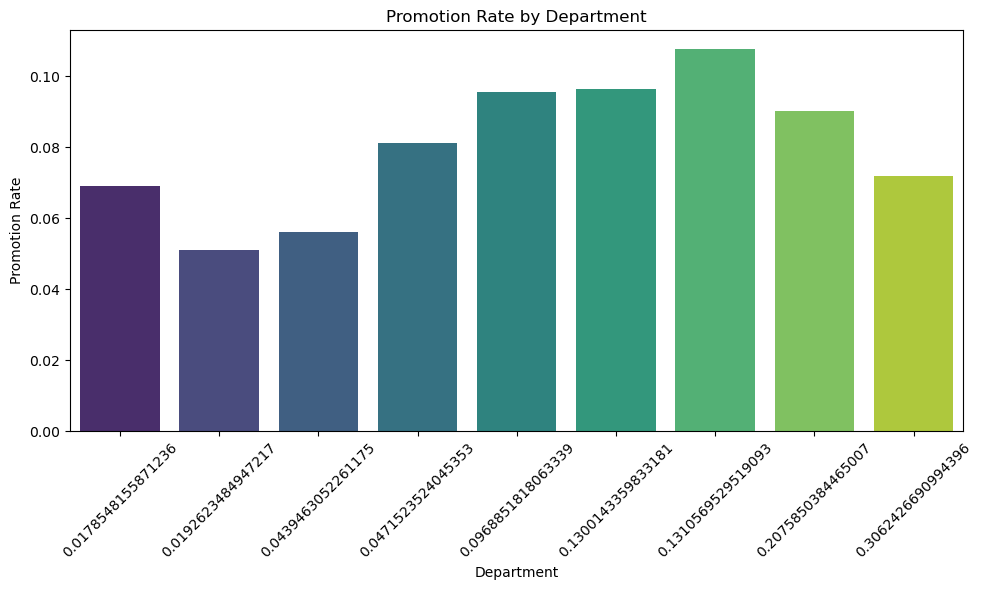

In [93]:
# -------------------------
# 7. DEPARTMENTAL PROMOTION TRENDS VISUALIZATION
# -------------------------
if 'department' in df.columns:
    print("\nPlotting Departmental Promotion Trends...")
    dept_rates = df.groupby('department')['is_promoted'].mean().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=dept_rates, x='department', y='is_promoted', palette='viridis')
    plt.title("Promotion Rate by Department")
    plt.ylabel("Promotion Rate")
    plt.xlabel("Department")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("department_promotion_trends.png")  # Save the plot if needed
    plt.show()
else:
    print("Column 'department' not available for departmental trend analysis.")

## 1.6 Feature Scaling

In [24]:
# # Feature Scaling

# standardisation: with the StandardScaler from sklearn

# set up the scaler
scaler = StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_train= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [26]:
X_train.dtypes

department                      float64
region                          float64
education                       float64
no_of_trainings                 float64
age                             float64
previous_year_rating            float64
length_of_service               float64
KPIs_met >80%                   float64
awards_won?                     float64
avg_training_score              float64
recruitment_channel_other       float64
recruitment_channel_sourcing    float64
recruitment_channel_referred    float64
gender_f                        float64
dtype: object

In [27]:
y_train.dtype

dtype('int64')

In [28]:
# Find numerical variables after one-hot encoding
X_train_num_cols = [n for n in X_train.columns if X_train[n].dtypes!='O']

In [29]:
# Percentage of null data in each column of the merged dataset
null_percentages = X_train.isnull().mean() * 100
null_percentages.sort_values(ascending=True)

department                      0.0
region                          0.0
education                       0.0
no_of_trainings                 0.0
age                             0.0
previous_year_rating            0.0
length_of_service               0.0
KPIs_met >80%                   0.0
awards_won?                     0.0
avg_training_score              0.0
recruitment_channel_other       0.0
recruitment_channel_sourcing    0.0
recruitment_channel_referred    0.0
gender_f                        0.0
dtype: float64

## 1.7 Modeling

## XGBoost Models (original + hyper tuned)

### Original 

In [41]:
# -------------------------
# 4. MODEL TRAINING: ENSEMBLE MODELS
# -------------------------
# --- MODEL 1: XGBoost Classifier (Ensemble Boosting) ---
print("\nTraining XGBoost Classifier...")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_f1 = f1_score(y_test, xgb_pred)
print("XGBoost Accuracy: {:.2f}%".format(xgb_acc * 100))
print("XGBoost F1-Score: {:.2f}".format(xgb_f1))
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, xgb_pred))
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_pred))


Training XGBoost Classifier...
XGBoost Accuracy: 79.44%
XGBoost F1-Score: 0.81
XGBoost Confusion Matrix:
[[1025  370]
 [ 206 1200]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.73      0.78      1395
           1       0.76      0.85      0.81      1406

    accuracy                           0.79      2801
   macro avg       0.80      0.79      0.79      2801
weighted avg       0.80      0.79      0.79      2801



C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:55:08] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [42]:
# Evaluate on the training set
xgb_train_pred = xgb_model.predict(X_train)
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred)
print("\nXGBoost Training Scores:")
print("Training Accuracy: {:.2f}%".format(xgb_train_acc * 100))
print("Training F1-Score: {:.2f}".format(xgb_train_f1))
print("Training Confusion Matrix:")
print(confusion_matrix(y_train, xgb_train_pred))
print("Training Classification Report:")
print(classification_report(y_train, xgb_train_pred))


XGBoost Training Scores:
Training Accuracy: 94.93%
Training F1-Score: 0.95
Training Confusion Matrix:
[[3016  257]
 [  74 3188]]
Training Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      3273
           1       0.93      0.98      0.95      3262

    accuracy                           0.95      6535
   macro avg       0.95      0.95      0.95      6535
weighted avg       0.95      0.95      0.95      6535



### Hyper Tuned

In [43]:
# -------------------------
# 6. HYPERPARAMETER TUNING FOR XGBoost
# -------------------------
print("\nHyperparameter Tuning for XGBoost:")
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 1.0]
}
grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)
print("Best parameters for XGBoost:", grid_xgb.best_params_)

# using f1 scoring:
# print("\nHyperparameter Tuning for XGBoost:")
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# param_grid_xgb = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0]
# }
# grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# grid_xgb.fit(X_train, y_train)
# print("Best parameters for XGBoost:", grid_xgb.best_params_)

# Results:
# Hyperparameter Tuning for XGBoost:
# Fitting 5 folds for each of 54 candidates, totalling 270 fits
# Parameters: { "use_label_encoder" } are not used.

#   warnings.warn(smsg, UserWarning)
# Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}



# using recall
# # -------------------------
# # 6. HYPERPARAMETER TUNING FOR XGBoost
# # -------------------------
# print("\nHyperparameter Tuning for XGBoost:")
# xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
# param_grid_xgb = {
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'n_estimators': [100, 200, 300],
#     'subsample': [0.8, 1.0]
# }
# grid_xgb = GridSearchCV(xgb_model, param_grid_xgb, cv=5, scoring='recall', n_jobs=-1, verbose=1)
# grid_xgb.fit(X_train, y_train)
# print("Best parameters for XGBoost:", grid_xgb.best_params_)

# Hyperparameter Tuning for XGBoost:
# Fitting 5 folds for each of 54 candidates, totalling 270 fits
# C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [12:11:16] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
# Parameters: { "use_label_encoder" } are not used.

#   warnings.warn(smsg, UserWarning)
# Best parameters for XGBoost: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


Hyperparameter Tuning for XGBoost:
Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:55:41] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best parameters for XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [44]:
best_xgb = grid_xgb.best_estimator_

# Evaluate on the training set
xgb_train_pred = best_xgb.predict(X_train)
xgb_train_acc = accuracy_score(y_train, xgb_train_pred)
xgb_train_f1 = f1_score(y_train, xgb_train_pred)
print("\nTuned XGBoost Training Scores:")
print("Training Accuracy: {:.2f}%".format(xgb_train_acc * 100))
print("Training F1-Score: {:.2f}".format(xgb_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, xgb_train_pred))
print("Training Classification Report:\n", classification_report(y_train, xgb_train_pred))

# Evaluate on the test set
xgb_better_pred = best_xgb.predict(X_test)
xgb_test_acc = accuracy_score(y_test, xgb_better_pred)
xgb_test_f1 = f1_score(y_test, xgb_better_pred)
print("\nTuned XGBoost Test Scores:")
print("Test Accuracy: {:.2f}%".format(xgb_test_acc * 100))
print("Test F1-Score: {:.2f}".format(xgb_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, xgb_better_pred))
print("Test Classification Report:\n", classification_report(y_test, xgb_better_pred))


# using f1 scoring:
# XGBoost Accuracy: 81.22%
# XGBoost F1-Score: 0.83
# XGBoost Confusion Matrix:
#  [[ 946  449]
#  [  77 1329]]
# XGBoost Classification Report:
#                precision    recall  f1-score   support

#            0       0.92      0.68      0.78      1395
#            1       0.75      0.95      0.83      1406

#     accuracy                           0.81      2801
#    macro avg       0.84      0.81      0.81      2801
# weighted avg       0.84      0.81      0.81      2801


# using recall scoring:
# XGBoost Accuracy: 81.22%
# XGBoost F1-Score: 0.83
# XGBoost Confusion Matrix:
#  [[ 946  449]
#  [  77 1329]]
# XGBoost Classification Report:
#                precision    recall  f1-score   support

#            0       0.92      0.68      0.78      1395
#            1       0.75      0.95      0.83      1406

#     accuracy                           0.81      2801
#    macro avg       0.84      0.81      0.81      2801
# weighted avg       0.84      0.81      0.81      2801


Tuned XGBoost Training Scores:
Training Accuracy: 88.91%
Training F1-Score: 0.90
Training Confusion Matrix:
 [[2709  564]
 [ 161 3101]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88      3273
           1       0.85      0.95      0.90      3262

    accuracy                           0.89      6535
   macro avg       0.90      0.89      0.89      6535
weighted avg       0.90      0.89      0.89      6535


Tuned XGBoost Test Scores:
Test Accuracy: 81.15%
Test F1-Score: 0.83
Test Confusion Matrix:
 [[1016  379]
 [ 149 1257]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.73      0.79      1395
           1       0.77      0.89      0.83      1406

    accuracy                           0.81      2801
   macro avg       0.82      0.81      0.81      2801
weighted avg       0.82      0.81      0.81      2801



## Random Forest Models (original + hyper tuned)

### Original 

In [45]:
# --- MODEL 2: Random Forest Classifier (Ensemble Bagging) ---
print("\nTraining Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)
print("Random Forest Accuracy: {:.2f}%".format(rf_acc * 100))
print("Random Forest F1-Score: {:.2f}".format(rf_f1))
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, rf_pred))
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_pred))


Training Random Forest Classifier...
Random Forest Accuracy: 78.86%
Random Forest F1-Score: 0.81
Random Forest Confusion Matrix:
[[ 987  408]
 [ 184 1222]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77      1395
           1       0.75      0.87      0.81      1406

    accuracy                           0.79      2801
   macro avg       0.80      0.79      0.79      2801
weighted avg       0.80      0.79      0.79      2801



### Hyper Tuned

In [47]:
# -------------------------
# 7. HYPERPARAMETER TUNING FOR RANDOM FOREST
# -------------------------
print("\nHyperparameter Tuning for Random Forest:")
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("Best parameters for RF:", grid_rf.best_params_)

# using f1 scoring:
# print("\nHyperparameter Tuning for Random Forest:")
# rf_model = RandomForestClassifier(random_state=42)
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
# grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='f1', n_jobs=-1, verbose=1)
# grid_rf.fit(X_train, y_train)
# print("Best parameters for RF:", grid_rf.best_params_)

# Results:
# Hyperparameter Tuning for Random Forest:
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best parameters for RF: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


# using recall scoring
# print("\nHyperparameter Tuning for Random Forest:")
# rf_model = RandomForestClassifier(random_state=42)
# param_grid_rf = {
#     'n_estimators': [100, 200, 300],
#     'max_depth': [None, 5, 10],
#     'min_samples_split': [2, 5, 10]
# }
# grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
# grid_rf.fit(X_train, y_train)
# print("Best parameters for RF:", grid_rf.best_params_)
# Hyperparameter Tuning for Random Forest:
# Fitting 5 folds for each of 27 candidates, totalling 135 fits
# Best parameters for RF: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 300}


Hyperparameter Tuning for Random Forest:
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for RF: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


In [48]:
best_rf = grid_rf.best_estimator_

# Evaluate on the training set
rf_train_pred = best_rf.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_train_f1 = f1_score(y_train, rf_train_pred)
print("\nTuned Random Forest Training Scores:")
print("Training Accuracy: {:.2f}%".format(rf_train_acc * 100))
print("Training F1-Score: {:.2f}".format(rf_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, rf_train_pred))
print("Training Classification Report:\n", classification_report(y_train, rf_train_pred))

# Evaluate on the test set
rf_better_pred = best_rf.predict(X_test)
rf_test_acc = accuracy_score(y_test, rf_better_pred)
rf_test_f1 = f1_score(y_test, rf_better_pred)
print("\nTuned Random Forest Test Scores:")
print("Test Accuracy: {:.2f}%".format(rf_test_acc * 100))
print("Test F1-Score: {:.2f}".format(rf_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, rf_better_pred))
print("Test Classification Report:\n", classification_report(y_test, rf_better_pred))

#using f1 scoring:
# Random Forest Accuracy: 79.47%
# Random Forest F1-Score: 0.81
# RF Confusion Matrix:
#  [[ 968  427]
#  [ 148 1258]]
# Random Forest Classification Report:
#                precision    recall  f1-score   support

#            0       0.87      0.69      0.77      1395
#            1       0.75      0.89      0.81      1406

#     accuracy                           0.79      2801
#    macro avg       0.81      0.79      0.79      2801
# weighted avg       0.81      0.79      0.79      2801



# using recall scoring:
# Random Forest Accuracy: 78.11%
# Random Forest F1-Score: 0.80
# RF Confusion Matrix:
#  [[ 936  459]
#  [ 154 1252]]
# Random Forest Classification Report:
#                precision    recall  f1-score   support

#            0       0.86      0.67      0.75      1395
#            1       0.73      0.89      0.80      1406

#     accuracy                           0.78      2801
#    macro avg       0.80      0.78      0.78      2801
# weighted avg       0.79      0.78      0.78      2801


Tuned Random Forest Training Scores:
Training Accuracy: 93.18%
Training F1-Score: 0.93
Training Confusion Matrix:
 [[2923  350]
 [  96 3166]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      3273
           1       0.90      0.97      0.93      3262

    accuracy                           0.93      6535
   macro avg       0.93      0.93      0.93      6535
weighted avg       0.93      0.93      0.93      6535


Tuned Random Forest Test Scores:
Test Accuracy: 79.51%
Test F1-Score: 0.81
Test Confusion Matrix:
 [[ 968  427]
 [ 147 1259]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77      1395
           1       0.75      0.90      0.81      1406

    accuracy                           0.80      2801
   macro avg       0.81      0.79      0.79      2801
weighted avg       0.81      0.80      0.79      2801



### Adjusted Hyper Tuning Parameters because overfitting

In [49]:
# -------------------------
# 7. HYPERPARAMETER TUNING FOR RANDOM FOREST
# -------------------------
print("\nFurther Hyperparameter Tuning for Random Forest:")
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5],
    'class_weight': ['balanced', None]
}
grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)
print("Best parameters for RF:", grid_rf.best_params_)


Further Hyperparameter Tuning for Random Forest:
Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best parameters for RF: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [50]:
best_rf_overfitting = grid_rf.best_estimator_

# Evaluate on the training set
rf_train_pred = best_rf_overfitting.predict(X_train)
rf_train_acc = accuracy_score(y_train, rf_train_pred)
rf_train_f1 = f1_score(y_train, rf_train_pred)
print("\nTuned Random Forest Training Scores:")
print("Training Accuracy: {:.2f}%".format(rf_train_acc * 100))
print("Training F1-Score: {:.2f}".format(rf_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, rf_train_pred))
print("Training Classification Report:\n", classification_report(y_train, rf_train_pred))

# Evaluate on the test set
rf_better_pred = best_rf_overfitting.predict(X_test)
rf_test_acc = accuracy_score(y_test, rf_better_pred)
rf_test_f1 = f1_score(y_test, rf_better_pred)
print("\nTuned Random Forest Test Scores:")
print("Test Accuracy: {:.2f}%".format(rf_test_acc * 100))
print("Test F1-Score: {:.2f}".format(rf_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, rf_better_pred))
print("Test Classification Report:\n", classification_report(y_test, rf_better_pred))


Tuned Random Forest Training Scores:
Training Accuracy: 93.18%
Training F1-Score: 0.93
Training Confusion Matrix:
 [[2923  350]
 [  96 3166]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      3273
           1       0.90      0.97      0.93      3262

    accuracy                           0.93      6535
   macro avg       0.93      0.93      0.93      6535
weighted avg       0.93      0.93      0.93      6535


Tuned Random Forest Test Scores:
Test Accuracy: 79.51%
Test F1-Score: 0.81
Test Confusion Matrix:
 [[ 968  427]
 [ 147 1259]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.69      0.77      1395
           1       0.75      0.90      0.81      1406

    accuracy                           0.80      2801
   macro avg       0.81      0.79      0.79      2801
weighted avg       0.81      0.80      0.79      2801



## Gradient Boosting Models (original + hyper tuned)

### Original 

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

# --- MODEL 4: Gradient Boosting Model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Evaluate Gradient Boosting Model
print("\nGradient Boosting Model Evaluation:")
print("Gradient Boosting Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred_gb)*100))
print("Gradient Boosting F1-Score: {:.2f}".format(f1_score(y_test, y_pred_gb)))
print("Gradient Boosting Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, y_pred_gb))


Gradient Boosting Model Evaluation:
Gradient Boosting Accuracy: 81.08%
Gradient Boosting F1-Score: 0.83
Gradient Boosting Confusion Matrix:
 [[ 948  447]
 [  83 1323]]
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.68      0.78      1395
           1       0.75      0.94      0.83      1406

    accuracy                           0.81      2801
   macro avg       0.83      0.81      0.81      2801
weighted avg       0.83      0.81      0.81      2801



In [52]:
# Evaluate on the training set
y_train_pred_gb = gb_model.predict(X_train)
gb_train_acc = accuracy_score(y_train, y_train_pred_gb)
gb_train_f1 = f1_score(y_train, y_train_pred_gb)
print("\nGradient Boosting Training Scores:")
print("Training Accuracy: {:.2f}%".format(gb_train_acc * 100))
print("Training F1-Score: {:.2f}".format(gb_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_gb))
print("Training Classification Report:\n", classification_report(y_train, y_train_pred_gb))


Gradient Boosting Training Scores:
Training Accuracy: 82.33%
Training F1-Score: 0.84
Training Confusion Matrix:
 [[2324  949]
 [ 206 3056]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.71      0.80      3273
           1       0.76      0.94      0.84      3262

    accuracy                           0.82      6535
   macro avg       0.84      0.82      0.82      6535
weighted avg       0.84      0.82      0.82      6535



### Hyper Tuned

In [53]:
# -------------------------
# 7. HYPERPARAMETER TUNING FOR GRADIENT BOOSTING
# -------------------------
print("\nHyperparameter Tuning for Gradient Boosting:")
# Define the model
gb_model = GradientBoostingClassifier(random_state=42)

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [70, 80, 90, 100, 200, 300],
    'learning_rate': [0.001, 0.01, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': [None, 'sqrt', 'log2']

}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='roc_auc')

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)



# using recall scoring
# print("\nHyperparameter Tuning for Gradient Boosting:")
# # Define the model
# gb_model = GradientBoostingClassifier(random_state=42)

# # Define the hyperparameters grid
# param_grid = {
#     'n_estimators': [100, 200, 300],
#     'learning_rate': [0.001, 0.01, 0.1],
#     'max_depth': [3, 4, 5],
#     'min_samples_split': [2, 5, 10],
#     'subsample': [0.8, 0.9, 1.0],
#     'max_features': [None, 'sqrt', 'log2']

# }

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='recall')

# # Fit the model to the data
# grid_search.fit(X_train, y_train)

# # Get the best parameters
# best_params = grid_search.best_params_
# print("Best Hyperparameters:", best_params)
# Hyperparameter Tuning for Gradient Boosting:
# Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}


Hyperparameter Tuning for Gradient Boosting:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 200, 'subsample': 1.0}


In [54]:
# Fit the best model
best_gb_model = grid_search.best_estimator_

# Evaluate the tuned Gradient Boosting model on the training set
gb_train_pred_tuned = best_gb_model.predict(X_train)
gb_train_acc_tuned = accuracy_score(y_train, gb_train_pred_tuned)
gb_train_f1_tuned = f1_score(y_train, gb_train_pred_tuned)
print("\nTuned Gradient Boosting Training Scores:")
print("Training Accuracy: {:.2f}%".format(gb_train_acc_tuned * 100))
print("Training F1-Score: {:.2f}".format(gb_train_f1_tuned))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, gb_train_pred_tuned))
print("Training Classification Report:\n", classification_report(y_train, gb_train_pred_tuned))

# Make predictions using the tuned model on the test set
gb_better_pred = best_gb_model.predict(X_test)
gb_test_acc_tuned = accuracy_score(y_test, gb_better_pred)
gb_test_f1_tuned = f1_score(y_test, gb_better_pred)
print("\nGradient Boosting Model Evaluation (after tuning):")
print("Test Accuracy: {:.2f}%".format(gb_test_acc_tuned * 100))
print("Test F1-Score: {:.2f}".format(gb_test_f1_tuned))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, gb_better_pred))
print("Test Classification Report:\n", classification_report(y_test, gb_better_pred))


Tuned Gradient Boosting Training Scores:
Training Accuracy: 86.99%
Training F1-Score: 0.88
Training Confusion Matrix:
 [[2605  668]
 [ 182 3080]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.80      0.86      3273
           1       0.82      0.94      0.88      3262

    accuracy                           0.87      6535
   macro avg       0.88      0.87      0.87      6535
weighted avg       0.88      0.87      0.87      6535


Gradient Boosting Model Evaluation (after tuning):
Test Accuracy: 81.04%
Test F1-Score: 0.83
Test Confusion Matrix:
 [[1007  388]
 [ 143 1263]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.72      0.79      1395
           1       0.76      0.90      0.83      1406

    accuracy                           0.81      2801
   macro avg       0.82      0.81      0.81      2801
weighted avg       0.82      0.81      0.81    

## SVM Models (original + hyper tuned)

### Original 

In [55]:
# --- MODEL 3: SVC Model ---
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Evaluate on the training set
svm_train_pred = svm_model.predict(X_train)
svm_train_acc = accuracy_score(y_train, svm_train_pred)
svm_train_f1 = f1_score(y_train, svm_train_pred)
print("\nSVC Training Scores:")
print("Training Accuracy: {:.2f}%".format(svm_train_acc * 100))
print("Training F1-Score: {:.2f}".format(svm_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, svm_train_pred))
print("Training Classification Report:\n", classification_report(y_train, svm_train_pred))

# Evaluate on the test set
svm_pred = svm_model.predict(X_test)
svm_test_acc = accuracy_score(y_test, svm_pred)
svm_test_f1 = f1_score(y_test, svm_pred)
print("\nSVC Test Scores:")
print("Test Accuracy: {:.2f}%".format(svm_test_acc * 100))
print("Test F1-Score: {:.2f}".format(svm_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
print("Test Classification Report:\n", classification_report(y_test, svm_pred))

# 1st try
# svm_model.fit(X_train, y_train)
# svm_pred = svm_model.predict(X_test)
# print("SVC Accuracy: {:.2f}%".format(accuracy_score(y_test, svm_pred)*100))
# print("SVC F1-Score: {:.2f}".format(f1_score(y_test, svm_pred)))
# print("SVC Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
# print("SVC Classification Report:\n", classification_report(y_test, svm_pred))

# 1st try result:
# SVC Accuracy: 65.12%
# SVC F1-Score: 0.64
# SVC Confusion Matrix:
#  [[951 444]
#  [533 873]]
# SVC Classification Report:
#                precision    recall  f1-score   support

#            0       0.64      0.68      0.66      1395
#            1       0.66      0.62      0.64      1406

#     accuracy                           0.65      2801
#    macro avg       0.65      0.65      0.65      2801
# weighted avg       0.65      0.65      0.65      2801



# second try:
# svm_model = SVC(C=0.8, kernel ='rbf')
# svm_model.fit(X_train, y_train)
# svm_pred = svm_model.predict(X_test)
# print("SVC Accuracy: {:.2f}%".format(accuracy_score(y_test, svm_pred)*100))
# print("SVC F1-Score: {:.2f}".format(f1_score(y_test, svm_pred)))
# print("SVC Confusion Matrix:\n", confusion_matrix(y_test, svm_pred))
# print("SVC Classification Report:\n", classification_report(y_test, svm_pred))

# 2nd try result:
# SVC Accuracy: 64.66%
# SVC F1-Score: 0.64
# SVC Confusion Matrix:
#  [[948 447]
#  [543 863]]
# SVC Classification Report:
#                precision    recall  f1-score   support

#            0       0.64      0.68      0.66      1395
#            1       0.66      0.61      0.64      1406

#     accuracy                           0.65      2801
#    macro avg       0.65      0.65      0.65      2801
# weighted avg       0.65      0.65      0.65      2801


# using linear:
# SVC Accuracy: 71.62%
# SVC F1-Score: 0.72
# SVC Confusion Matrix:
#  [[ 977  418]
#  [ 377 1029]]
# SVC Classification Report:
#                precision    recall  f1-score   support

#            0       0.72      0.70      0.71      1395
#            1       0.71      0.73      0.72      1406

#     accuracy                           0.72      2801
#    macro avg       0.72      0.72      0.72      2801
# weighted avg       0.72      0.72      0.72      2801


SVC Training Scores:
Training Accuracy: 79.37%
Training F1-Score: 0.82
Training Confusion Matrix:
 [[2202 1071]
 [ 277 2985]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.67      0.77      3273
           1       0.74      0.92      0.82      3262

    accuracy                           0.79      6535
   macro avg       0.81      0.79      0.79      6535
weighted avg       0.81      0.79      0.79      6535


SVC Test Scores:
Test Accuracy: 77.58%
Test F1-Score: 0.80
Test Confusion Matrix:
 [[ 906  489]
 [ 139 1267]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.65      0.74      1395
           1       0.72      0.90      0.80      1406

    accuracy                           0.78      2801
   macro avg       0.79      0.78      0.77      2801
weighted avg       0.79      0.78      0.77      2801



### Hyper Tuned

In [56]:
# -------------------------
# 8. HYPERPARAMETER TUNING FOR SVC
# -------------------------
print("\nHyperparameter Tuning for SVC:")

# Define the parameter grid for hyperparameter tuning
param_distributions = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
    'degree': [2, 3, 4]  # Only used for 'poly' kernel
}

# Initialize SVC model
svm_model = SVC(probability=True)  # Enable probability estimates for AUC scoring

# Perform Randomized Search with cross-validation
random_svm = RandomizedSearchCV(estimator=svm_model, param_distributions=param_distributions, 
                                scoring='roc_auc', cv=5, verbose=1, n_jobs=-1, n_iter=10, random_state=42)

# Fit the Randomized Search to the training data
random_svm.fit(X_train, y_train)

# Print best parameters
print("Best parameters for SVC:", random_svm.best_params_)


# using recall
# print("\nHyperparameter Tuning for SVC:")
# # Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'C': [0.1, 1, 10],  # Regularization parameter
#     'kernel': ['linear'],  # Kernel type
#     'gamma': ['scale', 'auto', 0.1, 1]  # Kernel coefficient for 'rbf' and 'poly'
# }

# # Perform Grid Search with cross-validation
# grid_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, 
#                            scoring='recall', cv=5, verbose=1, n_jobs=-1)

# # Fit the Grid Search to the training data
# grid_svm.fit(X_train, y_train)

# print("Best parameters for RF:", grid_svm.best_params_)


# Hyperparameter Tuning for SVC:
# Fitting 5 folds for each of 12 candidates, totalling 60 fits
# Best parameters for RF: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}


Hyperparameter Tuning for SVC:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for SVC: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 10}


In [59]:
# Get the best model from Grid Search
best_svm_model = random_svm.best_estimator_

# Evaluate on the training set
svm_train_pred_tuned = best_svm_model.predict(X_train)
svm_train_acc_tuned = accuracy_score(y_train, svm_train_pred_tuned)
svm_train_f1_tuned = f1_score(y_train, svm_train_pred_tuned)
print("\nTuned SVC Training Scores:")
print("Training Accuracy: {:.2f}%".format(svm_train_acc_tuned * 100))
print("Training F1-Score: {:.2f}".format(svm_train_f1_tuned))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, svm_train_pred_tuned))
print("Training Classification Report:\n", classification_report(y_train, svm_train_pred_tuned))

# Make predictions using the best model on the test set
svm_better_pred = best_svm_model.predict(X_test)

# Evaluate on the test set
svm_test_acc_tuned = accuracy_score(y_test, svm_better_pred)
svm_test_f1_tuned = f1_score(y_test, svm_better_pred)
print("\nBest Hyperparameters:", random_svm.best_params_)
print("Tuned SVC Test Scores:")
print("Test Accuracy: {:.2f}%".format(svm_test_acc_tuned * 100))
print("Test F1-Score: {:.2f}".format(svm_test_f1_tuned))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, svm_better_pred))
print("Test Classification Report:\n", classification_report(y_test, svm_better_pred))



# using recall:
# # Get the best model from Grid Search
# best_svm_model = grid_svm.best_estimator_

# # Evaluate on the training set
# svm_train_pred_tuned = best_svm_model.predict(X_train)
# svm_train_acc_tuned = accuracy_score(y_train, svm_train_pred_tuned)
# svm_train_f1_tuned = f1_score(y_train, svm_train_pred_tuned)
# print("\nTuned SVC Training Scores:")
# print("Training Accuracy: {:.2f}%".format(svm_train_acc_tuned * 100))
# print("Training F1-Score: {:.2f}".format(svm_train_f1_tuned))
# print("Training Confusion Matrix:\n", confusion_matrix(y_train, svm_train_pred_tuned))
# print("Training Classification Report:\n", classification_report(y_train, svm_train_pred_tuned))

# # Make predictions using the best model on the test set
# svm_better_pred = best_svm_model.predict(X_test)

# # Evaluate on the test set
# svm_test_acc_tuned = accuracy_score(y_test, svm_better_pred)
# svm_test_f1_tuned = f1_score(y_test, svm_better_pred)
# print("\nBest Hyperparameters:", grid_svm.best_params_)
# print("Tuned SVC Test Scores:")
# print("Test Accuracy: {:.2f}%".format(svm_test_acc_tuned * 100))
# print("Test F1-Score: {:.2f}".format(svm_test_f1_tuned))
# print("Test Confusion Matrix:\n", confusion_matrix(y_test, svm_better_pred))
# print("Test Classification Report:\n", classification_report(y_test, svm_better_pred))

# Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 5, 'max_features': None, 'min_samples_split': 10, 'n_estimators': 300, 'subsample': 1.0}
# SVC Accuracy: 72.51%
# SVC F1-Score: 0.73
# SVC Confusion Matrix:
#  [[ 980  415]
#  [ 355 1051]]
# SVC Classification Report:
#                precision    recall  f1-score   support

#            0       0.73      0.70      0.72      1395
#            1       0.72      0.75      0.73      1406

#     accuracy                           0.73      2801
#    macro avg       0.73      0.73      0.72      2801
# weighted avg       0.73      0.73      0.72      2801


Tuned SVC Training Scores:
Training Accuracy: 83.93%
Training F1-Score: 0.85
Training Confusion Matrix:
 [[2437  836]
 [ 214 3048]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      3273
           1       0.78      0.93      0.85      3262

    accuracy                           0.84      6535
   macro avg       0.85      0.84      0.84      6535
weighted avg       0.85      0.84      0.84      6535


Best Hyperparameters: {'kernel': 'rbf', 'gamma': 'auto', 'degree': 2, 'C': 10}
Tuned SVC Test Scores:
Test Accuracy: 77.79%
Test F1-Score: 0.80
Test Confusion Matrix:
 [[ 935  460]
 [ 162 1244]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.67      0.75      1395
           1       0.73      0.88      0.80      1406

    accuracy                           0.78      2801
   macro avg       0.79      0.78      0.78      2801
weighted a

## MLP Model (hyper tuned)

In [60]:
# Standardize data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the model with early stopping
mlp_model = MLPClassifier(random_state=42, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

# Define the parameter grid
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (50,), (100,), (50, 50)],  # Reduce neurons
    'activation': ['relu', 'tanh', 'logistic'],   
    'solver': ['adam', 'sgd'],                    
    'alpha': [0.0001, 0.001, 0.01, 0.1, 0.5],      # Stronger regularization
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [1000, 2000]
}

# Apply GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(
    estimator=mlp_model, 
    param_grid=param_grid, 
    cv=5, 
    scoring='accuracy',  # Use accuracy if classes are balanced
    n_jobs=-1, 
    verbose=2
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best model
best_mlp_model = grid_search.best_estimator_

# Predict on training and test data
y_pred_train = best_mlp_model.predict(X_train)
y_pred_test = best_mlp_model.predict(X_test)

# Train Evaluation
print("\nTrain Evaluation:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, y_pred_train))
print("Train Classification Report:\n", classification_report(y_train, y_pred_train))

# Test Evaluation
print("\nTest Evaluation:")
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test))
print("Test Classification Report:\n", classification_report(y_test, y_pred_test))

Fitting 5 folds for each of 1080 candidates, totalling 5400 fits

Train Evaluation:
Train Accuracy: 0.8137719969395563
Train Confusion Matrix:
 [[2382  891]
 [ 326 2936]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.73      0.80      3273
           1       0.77      0.90      0.83      3262

    accuracy                           0.81      6535
   macro avg       0.82      0.81      0.81      6535
weighted avg       0.82      0.81      0.81      6535


Test Evaluation:
Test Accuracy: 0.7886469118172081
Test Confusion Matrix:
 [[ 958  437]
 [ 155 1251]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.69      0.76      1395
           1       0.74      0.89      0.81      1406

    accuracy                           0.79      2801
   macro avg       0.80      0.79      0.79      2801
weighted avg       0.80      0.79      0.79      2801



## Lightgbm Models (original + hyper tuned)

### Original

In [61]:
# --- MODEL 5: LightGBM ---
lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)

lgb_train_pred = lgb_model.predict(X_train)
lgb_train_acc = accuracy_score(y_train, lgb_train_pred)
lgb_train_f1 = f1_score(y_train, lgb_train_pred)

lgb_pred = lgb_model.predict(X_test)
lgb_test_acc = accuracy_score(y_test, lgb_pred)
lgb_test_f1 = f1_score(y_test, lgb_pred)

# Train Evaluation
print("\nTrain Evaluation:")
print("Training Accuracy: {:.2f}%".format(lgb_train_acc * 100))
print("Training F1-Score: {:.2f}".format(lgb_train_f1))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, lgb_train_pred))
print("Train Classification Report:\n", classification_report(y_train, lgb_train_pred))

# Test Evaluation
print("\nTest Evaluation:")
print("Test Accuracy: {:.2f}%".format(lgb_test_acc * 100))
print("Test F1-Score: {:.2f}".format(lgb_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, lgb_pred))
print("Test Classification Report:\n", classification_report(y_test, lgb_pred))

[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499158 -> initscore=-0.003366
[LightGBM] [Info] Start training from score -0.003366

Train Evaluation:
Training Accuracy: 88.95%
Training F1-Score: 0.90
Train Confusion Matrix:
 [[2671  602]
 [ 120 3142]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.88      3273
           1       0.84      0.96      0.90      3262

    accuracy                           0.89      6535
   macro avg       0.90      0.89      0.89      6535
weighted avg       0.90

### Hyper Tuned

In [62]:
# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'min_child_samples': [20, 30, 40],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the model
lgb_model = LGBMClassifier(random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Test only 100 random parameter sets
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Optimize for AUC score
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42  # Ensure reproducibility
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Get the best model
best_model = random_search.best_estimator_

# Refit the best model on the entire training set
best_model.fit(X_train, y_train)

# Predictions and evaluation on train and test sets
train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

# Train evaluation
train_acc = accuracy_score(y_train, train_pred)
train_f1 = f1_score(y_train, train_pred)

# Test evaluation
test_acc = accuracy_score(y_test, test_pred)
test_f1 = f1_score(y_test, test_pred)

print("\nTrain Evaluation:")
print("Training Accuracy: {:.2f}%".format(train_acc * 100))
print("Training F1-Score: {:.2f}".format(train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, train_pred))
print("Training Classification Report:\n", classification_report(y_train, train_pred))

print("\nTest Evaluation:")
print("Test Accuracy: {:.2f}%".format(test_acc * 100))
print("Test F1-Score: {:.2f}".format(test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, test_pred))
print("Test Classification Report:\n", classification_report(y_test, test_pred))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499158 -> initscore=-0.003366
[LightGBM] [Info] Start training from score -0.003366
Best Parameters: {'subsample': 0.6, 'num_leaves': 31, 'n_estimators': 100, 'min_child_samples': 20, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove t

## CatBoost Models (original + hyper tuned)

In [63]:
# --- MODEL 6: CatBoost ---
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train, y_train)

cat_train_pred = cat_model.predict(X_train)
cat_train_acc = accuracy_score(y_train, cat_train_pred)
cat_train_f1 = f1_score(y_train, cat_train_pred)

cat_pred = cat_model.predict(X_test)
cat_test_acc = accuracy_score(y_test, cat_pred)
cat_test_f1 = f1_score(y_test, cat_pred)

# Train Evaluation
print("\nTrain Evaluation:")
print("Training Accuracy: {:.2f}%".format(cat_train_acc * 100))
print("Training F1-Score: {:.2f}".format(cat_train_f1))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, cat_train_pred))
print("Train Classification Report:\n", classification_report(y_train, cat_train_pred))

# Test Evaluation
print("\nTest Evaluation:")
print("Test Accuracy: {:.2f}%".format(cat_test_acc * 100))
print("Test F1-Score: {:.2f}".format(cat_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, cat_pred))
print("Test Classification Report:\n", classification_report(y_test, cat_pred))


Train Evaluation:
Training Accuracy: 89.33%
Training F1-Score: 0.90
Train Confusion Matrix:
 [[2713  560]
 [ 137 3125]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.83      0.89      3273
           1       0.85      0.96      0.90      3262

    accuracy                           0.89      6535
   macro avg       0.90      0.89      0.89      6535
weighted avg       0.90      0.89      0.89      6535


Test Evaluation:
Test Accuracy: 80.69%
Test F1-Score: 0.82
Test Confusion Matrix:
 [[ 995  400]
 [ 141 1265]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      1395
           1       0.76      0.90      0.82      1406

    accuracy                           0.81      2801
   macro avg       0.82      0.81      0.81      2801
weighted avg       0.82      0.81      0.81      2801



### Hyper Tuned Model

In [64]:
# Define the hyperparameter distribution
param_dist = {
    'iterations': [100, 200, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.05, 0.1],
    'depth': [4, 6, 8, 10],
    'l2_leaf_reg': [1, 3, 5, 7, 9],
    'border_count': [32, 64, 128],
    'random_strength': [1, 2, 5, 10],
    'bagging_temperature': [0.1, 0.5, 1.0, 2.0]
}

# Initialize CatBoost model
cat_model = CatBoostClassifier(verbose=0, random_state=42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_dist,
    n_iter=50,  # Try 50 random combinations
    cv=5,  # 5-fold cross-validation
    scoring='f1',  # Optimize for F1-score
    n_jobs=-1,  # Use all CPU cores
    verbose=1,
    random_state=42
)

# Fit Randomized Search to the data
random_search.fit(X_train, y_train)

# Get the best model
best_cat_model = random_search.best_estimator_

# Predictions with the best model
cat_train_pred = best_cat_model.predict(X_train)
cat_train_acc = accuracy_score(y_train, cat_train_pred)
cat_train_f1 = f1_score(y_train, cat_train_pred)

cat_pred = best_cat_model.predict(X_test)
cat_test_acc = accuracy_score(y_test, cat_pred)
cat_test_f1 = f1_score(y_test, cat_pred)

# Train Evaluation
print("\nTrain Evaluation:")
print("Training Accuracy: {:.2f}%".format(cat_train_acc * 100))
print("Training F1-Score: {:.2f}".format(cat_train_f1))
print("Train Confusion Matrix:\n", confusion_matrix(y_train, cat_train_pred))
print("Train Classification Report:\n", classification_report(y_train, cat_train_pred))

# Test Evaluation
print("\nTest Evaluation:")
print("Test Accuracy: {:.2f}%".format(cat_test_acc * 100))
print("Test F1-Score: {:.2f}".format(cat_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, cat_pred))
print("Test Classification Report:\n", classification_report(y_test, cat_pred))

# Print the best hyperparameters found
print("\nBest Hyperparameters Found by RandomizedSearchCV:")
print(random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits

Train Evaluation:
Training Accuracy: 83.90%
Training F1-Score: 0.85
Train Confusion Matrix:
 [[2428  845]
 [ 207 3055]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      3273
           1       0.78      0.94      0.85      3262

    accuracy                           0.84      6535
   macro avg       0.85      0.84      0.84      6535
weighted avg       0.85      0.84      0.84      6535


Test Evaluation:
Test Accuracy: 80.83%
Test F1-Score: 0.83
Test Confusion Matrix:
 [[ 968  427]
 [ 110 1296]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.69      0.78      1395
           1       0.75      0.92      0.83      1406

    accuracy                           0.81      2801
   macro avg       0.83      0.81      0.81      2801
weighted avg       0.82      0.81      0.81     

## Ensemble Models (Stacked and Voting Models)

### Ensemble Model with the best Models

In [65]:
# -------------------------
# 8. ENSEMBLE METHODS & STACKING
# -------------------------
from sklearn.ensemble import StackingClassifier
print("\nTraining a Stacking Ensemble Model:")
# Base models: Best XGBoost, Best Gradient Boosting, and SVM

estimators = [
    ('xgb', best_xgb),
    ('gb', best_gb_model),
    ('lgb', best_model)
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
stacking_model.fit(X_train, y_train)

# Evaluate on the training set
stack_train_pred = stacking_model.predict(X_train)
stack_train_acc = accuracy_score(y_train, stack_train_pred)
stack_train_f1 = f1_score(y_train, stack_train_pred)
print("\nStacking Ensemble Training Scores:")
print("Training Accuracy: {:.2f}%".format(stack_train_acc * 100))
print("Training F1-Score: {:.2f}".format(stack_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, stack_train_pred))
print("Training Classification Report:\n", classification_report(y_train, stack_train_pred))

# Evaluate on the test set
stack_pred = stacking_model.predict(X_test)
stack_test_acc = accuracy_score(y_test, stack_pred)
stack_test_f1 = f1_score(y_test, stack_pred)
print("\nStacking Ensemble Test Scores:")
print("Test Accuracy: {:.2f}%".format(stack_test_acc * 100))
print("Test F1-Score: {:.2f}".format(stack_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, stack_pred))
print("Test Classification Report:\n", classification_report(y_test, stack_pred))


# using f1 scoring for the hyper tuned models (xgboost and rf models):
# Stacking Ensemble Accuracy: 78.83%
# Stacking Ensemble F1-Score: 0.80
# Stacking Confusion Matrix:
#  [[1013  382]
#  [ 211 1195]]
# Stacking Classification Report:
#                precision    recall  f1-score   support

#            0       0.83      0.73      0.77      1395
#            1       0.76      0.85      0.80      1406

#     accuracy                           0.79      2801
#    macro avg       0.79      0.79      0.79      2801
# weighted avg       0.79      0.79      0.79      2801


## using recall for the hyper tuned models (xgboost and rf models):
# Stacking Ensemble Accuracy: 78.69%
# Stacking Ensemble F1-Score: 0.80
# Stacking Confusion Matrix:
#  [[ 998  397]
#  [ 200 1206]]
# Stacking Classification Report:
#                precision    recall  f1-score   support

#            0       0.83      0.72      0.77      1395
#            1       0.75      0.86      0.80      1406

#     accuracy                           0.79      2801
#    macro avg       0.79      0.79      0.79      2801
# weighted avg       0.79      0.79      0.79      2801


## using recall for the hyper tuned models (xgboost and rf models) and with SVC model hyper tuned:

# Stacking Ensemble Accuracy: 79.58%
# Stacking Ensemble F1-Score: 0.81
# Stacking Confusion Matrix:
#  [[1013  382]
#  [ 190 1216]]
# Stacking Classification Report:
#                precision    recall  f1-score   support

#            0       0.84      0.73      0.78      1395
#            1       0.76      0.86      0.81      1406

#     accuracy                           0.80      2801
#    macro avg       0.80      0.80      0.79      2801
# weighted avg       0.80      0.80      0.79      2801





# from sklearn.ensemble import StackingClassifier
# print("\nTraining a Stacking Ensemble Model:")
# # Base models: Best XGBoost, Best Random Forest, and SVM

# estimators = [
#     ('xgb', best_xgb),
#     ('rf', best_rf),
#     ('svm', best_svm_model) ## havent tested poly and rbf because takes too long to test all 3. test seperately
# ]

# stacking_model_2 = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
# stacking_model_2.fit(X_train, y_train)

# # Evaluate on the training set
# stack_train_pred_2 = stacking_model_2.predict(X_train)
# stack_train_acc_2 = accuracy_score(y_train, stack_train_pred_2)
# stack_train_f1_2 = f1_score(y_train, stack_train_pred_2)
# print("\nStacking Ensemble 2 Training Scores:")
# print("Training Accuracy: {:.2f}%".format(stack_train_acc_2 * 100))
# print("Training F1-Score: {:.2f}".format(stack_train_f1_2))
# print("Training Confusion Matrix:\n", confusion_matrix(y_train, stack_train_pred_2))
# print("Training Classification Report:\n", classification_report(y_train, stack_train_pred_2))

# # Evaluate on the test set
# stack_pred_2 = stacking_model_2.predict(X_test)
# stack_test_acc_2 = accuracy_score(y_test, stack_pred_2)
# stack_test_f1_2 = f1_score(y_test, stack_pred_2)
# print("\nStacking Ensemble 2 Test Scores:")
# print("Test Accuracy: {:.2f}%".format(stack_test_acc_2 * 100))
# print("Test F1-Score: {:.2f}".format(stack_test_f1_2))
# print("Test Confusion Matrix:\n", confusion_matrix(y_test, stack_pred_2))
# print("Test Classification Report:\n", classification_report(y_test, stack_pred_2))




# from sklearn.ensemble import StackingClassifier
# print("\nTraining a Stacking Ensemble Model:")
# # Base models: Best XGBoost, Best Random Forest, Best SVM, and Best Gradient Boosting

# estimators = [
#     ('xgb', best_xgb),
#     ('rf', best_rf),
#     ('svm', best_svm_model)
#     ('gb', best_gb_model)
# ]

# stacking_model_3 = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
# stacking_model_3.fit(X_train, y_train)

# # Evaluate on the training set
# stack_train_pred_3 = stacking_model_3.predict(X_train)
# stack_train_acc_3 = accuracy_score(y_train, stack_train_pred_3)
# stack_train_f1_3 = f1_score(y_train, stack_train_pred_3)
# print("\nStacking Ensemble 3 Training Scores:")
# print("Training Accuracy: {:.2f}%".format(stack_train_acc_3 * 100))
# print("Training F1-Score: {:.2f}".format(stack_train_f1_3))
# print("Training Confusion Matrix:\n", confusion_matrix(y_train, stack_train_pred_3))
# print("Training Classification Report:\n", classification_report(y_train, stack_train_pred_3))

# # Evaluate on the test set
# stack_pred_3 = stacking_model_3.predict(X_test)
# stack_test_acc_3 = accuracy_score(y_test, stack_pred_3)
# stack_test_f1_3 = f1_score(y_test, stack_pred_3)
# print("\nStacking Ensemble 3 Test Scores:")
# print("Test Accuracy: {:.2f}%".format(stack_test_acc_3 * 100))
# print("Test F1-Score: {:.2f}".format(stack_test_f1_3))
# print("Test Confusion Matrix:\n", confusion_matrix(y_test, stack_pred_3))
# print("Test Classification Report:\n", classification_report(y_test, stack_pred_3))


Training a Stacking Ensemble Model:


C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:41] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499158 -> initscore=-0.003366
[LightGBM] [Info] Start training from score -0.003366


C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:46] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:28:47] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 2609, number of negative: 2619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000756 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 5228, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499044 -> initscore=-0.003826
[LightGBM] [Info] Start training from score -0.003826
[LightGBM] [Info] Number of positive: 2609, number of negative: 2619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000694 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 5228, number of used features: 14
[LightGBM] [Info] [binary:

C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:29:01] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Stacking Ensemble Training Scores:
Training Accuracy: 82.48%
Training F1-Score: 0.83
Training Confusion Matrix:
 [[2498  775]
 [ 370 2892]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      3273
           1       0.79      0.89      0.83      3262

    accuracy                           0.82      6535
   macro avg       0.83      0.82      0.82      6535
weighted avg       0.83      0.82      0.82      6535


Stacking Ensemble Test Scores:
Test Accuracy: 79.19%
Test F1-Score: 0.81
Test Confusion Matrix:
 [[1004  391]
 [ 192 1214]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.72      0.77      1395
           1       0.76      0.86      0.81      1406

    accuracy                           0.79      2801
   macro avg       0.80      0.79      0.79      2801
weighted avg       0.80      0.79      0.79      2801



In [66]:
# -------------------------
# 8. ENSEMBLE METHODS & STACKING
# -------------------------
from sklearn.ensemble import StackingClassifier
print("\nTraining a Stacking Ensemble Model:")
# Base models: Best XGBoost, Best Gradient Boosting, and SVM

estimators = [
    ('xgb', best_xgb),
    ('gb', best_gb_model),
    ('lgb', best_model),
    ('cat', best_cat_model)
]

stacking_model_2 = StackingClassifier(estimators=estimators, final_estimator=xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
stacking_model_2.fit(X_train, y_train)

# Evaluate on the training set
stack_train_pred_2 = stacking_model_2.predict(X_train)
stack_train_acc_2 = accuracy_score(y_train, stack_train_pred_2)
stack_train_f1_2 = f1_score(y_train, stack_train_pred_2)
print("\nStacking Ensemble Training Scores:")
print("Training Accuracy: {:.2f}%".format(stack_train_acc_2 * 100))
print("Training F1-Score: {:.2f}".format(stack_train_f1_2))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, stack_train_pred_2))
print("Training Classification Report:\n", classification_report(y_train, stack_train_pred_2))

# Evaluate on the test set
stack_pred_2 = stacking_model_2.predict(X_test)
stack_test_acc_2 = accuracy_score(y_test, stack_pred_2)
stack_test_f1_2 = f1_score(y_test, stack_pred_2)
print("\nStacking Ensemble Test Scores:")
print("Test Accuracy: {:.2f}%".format(stack_test_acc_2 * 100))
print("Test F1-Score: {:.2f}".format(stack_test_f1_2))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, stack_pred_2))
print("Test Classification Report:\n", classification_report(y_test, stack_pred_2))


Training a Stacking Ensemble Model:


C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:27] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000589 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499158 -> initscore=-0.003366
[LightGBM] [Info] Start training from score -0.003366


C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:32] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:33] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:32:34] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 2609, number of negative: 2619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000916 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 210
[LightGBM] [Info] Number of data points in the train set: 5228, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499044 -> initscore=-0.003826
[LightGBM] [Info] Start training from score -0.003826
[LightGBM] [Info] Number of positive: 2609, number of negative: 2619
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000573 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 211
[LightGBM] [Info] Number of data points in the train set: 5228, number of used features: 14
[LightGBM] [Info] [binary:

C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:02] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Stacking Ensemble Training Scores:
Training Accuracy: 82.26%
Training F1-Score: 0.83
Training Confusion Matrix:
 [[2528  745]
 [ 414 2848]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.77      0.81      3273
           1       0.79      0.87      0.83      3262

    accuracy                           0.82      6535
   macro avg       0.83      0.82      0.82      6535
weighted avg       0.83      0.82      0.82      6535


Stacking Ensemble Test Scores:
Test Accuracy: 78.65%
Test F1-Score: 0.80
Test Confusion Matrix:
 [[1013  382]
 [ 216 1190]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      1395
           1       0.76      0.85      0.80      1406

    accuracy                           0.79      2801
   macro avg       0.79      0.79      0.79      2801
weighted avg       0.79      0.79      0.79      2801



## Voting Model

### Hard Voting

In [67]:
from sklearn.ensemble import VotingClassifier

# Define the Voting Classifier with your best models
voting_model = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('gb', best_gb_model),
        ('lgb', best_model)  # Ensure best_model is properly defined
    ],
    voting='hard'  # Change to 'soft' if probability-based voting is preferred
)

# Train the Voting Classifier
voting_model.fit(X_train, y_train)

# Evaluate on the training set
voting_train_pred = voting_model.predict(X_train)
voting_train_acc = accuracy_score(y_train, voting_train_pred)
voting_train_f1 = f1_score(y_train, voting_train_pred)
print("\nVoting Ensemble Training Scores:")
print("Training Accuracy: {:.2f}%".format(voting_train_acc * 100))
print("Training F1-Score: {:.2f}".format(voting_train_f1))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, voting_train_pred))
print("Training Classification Report:\n", classification_report(y_train, voting_train_pred))

# Evaluate on the test set
voting_pred = voting_model.predict(X_test)
voting_test_acc = accuracy_score(y_test, voting_pred)
voting_test_f1 = f1_score(y_test, voting_pred)
print("\nVoting Ensemble Test Scores:")
print("Test Accuracy: {:.2f}%".format(voting_test_acc * 100))
print("Test F1-Score: {:.2f}".format(voting_test_f1))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, voting_pred))
print("Test Classification Report:\n", classification_report(y_test, voting_pred))




# Voting Ensemble 3 Training Scores:

# estimators = [
#     ('xgb', best_xgb),
#     ('rf', best_rf),
#     ('gb', best_gb_model)
# ]

# Training Accuracy: 84.09%
# Training F1-Score: 0.85
# Training Confusion Matrix:
#  [[2527  746]
#  [ 294 2968]]
# Training Classification Report:
#                precision    recall  f1-score   support

#            0       0.90      0.77      0.83      3273
#            1       0.80      0.91      0.85      3262

#     accuracy                           0.84      6535
#    macro avg       0.85      0.84      0.84      6535
# weighted avg       0.85      0.84      0.84      6535


# Voting Ensemble 3 Test Scores:
# Test Accuracy: 80.72%
# Test F1-Score: 0.82
# Test Confusion Matrix:
#  [[ 989  406]
#  [ 134 1272]]
# Test Classification Report:
#                precision    recall  f1-score   support

#            0       0.88      0.71      0.79      1395
#            1       0.76      0.90      0.82      1406

#     accuracy                           0.81      2801
#    macro avg       0.82      0.81      0.81      2801
# weighted avg       0.82      0.81      0.81      2801

C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:33:30] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000439 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499158 -> initscore=-0.003366
[LightGBM] [Info] Start training from score -0.003366

Voting Ensemble Training Scores:
Training Accuracy: 87.13%
Training F1-Score: 0.88
Training Confusion Matrix:
 [[2588  685]
 [ 156 3106]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      3273
           1       0.82      0.95      0.88      3262

    accuracy                           0.87      6535
   macro avg       0.88      0.87      0.87      6535
we

### Soft Voting

In [68]:
from sklearn.ensemble import VotingClassifier

# Define the Voting Classifier with your best models
voting_model_s = VotingClassifier(
    estimators=[
        ('xgb', best_xgb),
        ('gb', best_gb_model),
        ('lgb', best_model)  # Ensure best_model is properly defined
    ],
    voting='soft'  # Change to 'soft' if probability-based voting is preferred
)

# Train the Voting Classifier
voting_model_s.fit(X_train, y_train)

# Evaluate on the training set
voting_train_pred_s = voting_model_s.predict(X_train)
voting_train_acc_s = accuracy_score(y_train, voting_train_pred_s)
voting_train_f1_s = f1_score(y_train, voting_train_pred_s)
print("\nVoting Ensemble Training Scores:")
print("Training Accuracy: {:.2f}%".format(voting_train_acc_s * 100))
print("Training F1-Score: {:.2f}".format(voting_train_f1_s))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, voting_train_pred_s))
print("Training Classification Report:\n", classification_report(y_train, voting_train_pred_s))

# Evaluate on the test set
voting_pred_s = voting_model_s.predict(X_test)
voting_test_acc_s = accuracy_score(y_test, voting_pred_s)
voting_test_f1_s = f1_score(y_test, voting_pred_s)
print("\nVoting Ensemble Test Scores:")
print("Test Accuracy: {:.2f}%".format(voting_test_acc_s * 100))
print("Test F1-Score: {:.2f}".format(voting_test_f1_s))
print("Test Confusion Matrix:\n", confusion_matrix(y_test, voting_pred_s))
print("Test Classification Report:\n", classification_report(y_test, voting_pred_s))


# Voting Ensemble 3 Training Scores:

# estimators = [
#     ('xgb', best_xgb),
#     ('rf', best_rf),
#     ('gb', best_gb_model)
# ]

# Training Accuracy: 84.09%
# Training F1-Score: 0.85
# Training Confusion Matrix:
#  [[2527  746]
#  [ 294 2968]]
# Training Classification Report:
#                precision    recall  f1-score   support

#            0       0.90      0.77      0.83      3273
#            1       0.80      0.91      0.85      3262

#     accuracy                           0.84      6535
#    macro avg       0.85      0.84      0.84      6535
# weighted avg       0.85      0.84      0.84      6535


# Voting Ensemble 3 Test Scores:
# Test Accuracy: 80.72%
# Test F1-Score: 0.82
# Test Confusion Matrix:
#  [[ 989  406]
#  [ 134 1272]]
# Test Classification Report:
#                precision    recall  f1-score   support

#            0       0.88      0.71      0.79      1395
#            1       0.76      0.90      0.82      1406

#     accuracy                           0.81      2801
#    macro avg       0.82      0.81      0.81      2801
# weighted avg       0.82      0.81      0.81      2801

C:\Users\tswr1\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [10:34:49] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3262, number of negative: 3273
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000391 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 213
[LightGBM] [Info] Number of data points in the train set: 6535, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499158 -> initscore=-0.003366
[LightGBM] [Info] Start training from score -0.003366

Voting Ensemble Training Scores:
Training Accuracy: 87.27%
Training F1-Score: 0.88
Training Confusion Matrix:
 [[2594  679]
 [ 153 3109]]
Training Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.79      0.86      3273
           1       0.82      0.95      0.88      3262

    accuracy                           0.87      6535
   macro avg       0.88      0.87      0.87      6535
we

### 1.8 Documentation of Best Models

In [197]:
import IPython.display as display
# Combined data for all models
combined_data = {
    "Metric": ["Training Accuracy", "Training F1-Score", "Test Accuracy", "Test F1-Score", "Chosen Model"],
    "LightGBM": ["84.58%", "0.86", "81.69%", "0.84", ""],
    "Gradient Boosting": ["86.99%", "0.88", "81.04%", "0.83", ""],
    "XGBoost": ["88.91%", "0.90", "81.15%", "0.83", ""],
    "Stacked 3 Models": ["82.48%", "0.83", "79.19%", "0.81", ""],
    "Stacked 4 Models": ["82.26%", "0.83", "78.65%", "0.80", ""],
    "Voting (Hard)": ["87.13%", "0.88", "81.29%", "0.83", ""],
    "Voting (Soft)": ["87.27%", "0.88", "81.79%", "0.83", "✅"]  # Add the tick for Voting (Soft)
}

# Create DataFrame
combined_df = pd.DataFrame(combined_data)

# Display the table without index
display.display(combined_df.style.set_table_styles([{
    'selector': 'thead th', 
    'props': [('background-color', '#f5f5f5'), ('font-weight', 'bold')]},
    {'selector': 'td', 
     'props': [('padding', '10px'), ('text-align', 'center'), ('font-size', '16px')]},
    {'selector': 'table', 
     'props': [('width', '100%'), ('border-collapse', 'collapse')]}]).hide(axis='index'))

Metric,LightGBM,Gradient Boosting,XGBoost,Stacked 3 Models,Stacked 4 Models,Voting (Hard),Voting (Soft)
Training Accuracy,84.58%,86.99%,88.91%,82.48%,82.26%,87.13%,87.27%
Training F1-Score,0.86,0.88,0.90,0.83,0.83,0.88,0.88
Test Accuracy,81.69%,81.04%,81.15%,79.19%,78.65%,81.29%,81.79%
Test F1-Score,0.84,0.83,0.83,0.81,0.80,0.83,0.83
Chosen Model,,,,,,,✅
